# EDA

Para describir la data que tenemos empecemos por la cantidad de datos que tenemos y las tesis:

## Formato

El formato de las tesis es archivos pdfs, al principio se determina los registros de las tesis que deben ser descargados, estos archivos fueron obtenidos desde el siguiente link: http://saber.ucv.ve/handle/10872/2/browse?type=dateissued&sort_by=2&order=ASC&rpp=8211&etal=0&submit_browse=Actualizar

En este link fue la manera en que obtenemos todas las tesis, dependiendo de la fecha de consulta puede que alla mas tesis subidas en la pagina. Para obtener este link se navega desde la pagina de inicio luego en 2) Tesis, luego se selecionar pregrado en el menu dropdown y luego en ir; se selecciona pregrado en las letras azules; esto nos devuelve al menu anterior pero con pregrado preseleccionado (el url donde se empieza es importante ya que si se selecciona el siguiente paso de Fecha de publicacion, siempre va a Tesis); Se escoge fecha de publicacion y nos da el siguiente url: http://saber.ucv.ve/handle/10872/2/browse?type=dateissued&submit_browse=Fecha+Publicaci%C3%B3n 

Si luego le damos al boton de actualizar para mostrar mas resultados nos damos cuenta que el valor `rpp` si es cambiado nos pueden enseñar todas las tesis que necesitamos el resultado es http://saber.ucv.ve/handle/10872/2/browse?type=dateissued&sort_by=2&order=ASC&rpp=30&etal=0&submit_browse=Actualizar

De esta forma se logro obtener el link para descargar todas las tesis en una sola pagina de HTML.

### Datos a extraer

Ahora, los datos a extraer de las tesis son: 
- Año de la tesis (Ejm: 27-May-2011)
- Titulo de la tesis (Ejm: Estudio de sobretensiones por maniobra debido a energización de bancos de condensadores y transformadores en líneas de transmisión de 115kV) 
- Autor de la tesis (Ejm: De Gregorio S., Luis T.)
- Tamaño del archivo (Ejm: 6.77 MB)
- Link de la tesis (Ejm: http://saber.ucv.ve/handle/10872/11222)
- Link de direccion de tesis donde esta el pdf (este es el descargable) (Ejm: http://saber.ucv.ve/bitstream/10872/17712/1/TESIS%20DE%20GRADO%20LUIS%20DE%20GREGORIO.pdf)
- Resumen (Este dato esta vacio por la cantidad de erroes que se podian presentar, ya sea de caracteres o de falta de resumen)

### Para extraer todos estos datos

Al final estos datos seran almacenados un un csv, que luego puede utilizarce este data frame para realizar la operacion de descarga de el link donde esta el pdf, los demas datos pueden ser utilizados como metada del archivo.

El archivo `scraperv3.py` es el encargado de obtener todos los datos de la tesis y guardalos en un archivo csv. El la funcion main se especifica la cantida de archivos a guardar, en este caso se utilizaron **8211**

Estos datos se guardaron en `csv_files/url_thesis_8211.csv` Estos fueron todos los datos


In [23]:
## Muestra de el archivo inicial con scrapers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../csv_files/url_thesis_8211.csv")
df

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77 MB,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN
1,2,2010,La Economía del Ocio como una alternativa de e...,"Rivera, Elizabeth",2 MB,http://saber.ucv.ve/handle/10872/16245,http://saber.ucv.ve/bitstream/10872/16245/1/TG...,NaN
2,3,27-May-2011,La producción de conocimiento : un análisis mé...,"Adrian Mogollón, Julia; Echezuria Perozo, Jorg...",995.92 kB,http://saber.ucv.ve/handle/10872/29,http://saber.ucv.ve/bitstream/10872/29/1/TL-EB...,NaN
3,4,27-May-2011,Desarrollo de un algoritmo computacional para ...,"D'Amico, Walter F.",506.32 kB,http://saber.ucv.ve/handle/10872/32,http://saber.ucv.ve/bitstream/10872/32/1/Tesis...,NaN
4,5,27-May-2011,Evaluación geofísica integral de los conos alu...,"Cragno, Analia V.; Romero, Marcos A.",3.02 MB,http://saber.ucv.ve/handle/10872/31,http://saber.ucv.ve/bitstream/10872/31/1/Evalu...,NaN
...,...,...,...,...,...,...,...,...
8206,8207,4-Dec-2020,Elaboración de un manual de procedimientos e i...,"Armas R., Rodolfo J.",924.37 kB,http://saber.ucv.ve/handle/10872/20906,http://saber.ucv.ve/bitstream/10872/20906/1/TE...,NaN
8207,8208,8-Mar-2021,Condiciones de vida de los estudiantes de Geoq...,"Pérez, Andrea; Pinto, Hendrith",7.21 MB,http://saber.ucv.ve/handle/10872/20969,http://saber.ucv.ve/bitstream/10872/20969/1/CO...,NaN
8208,8209,8-Mar-2021,Análisis de los elementos pospornográficos de ...,"Belandria, Sofía",1.13 MB,http://saber.ucv.ve/handle/10872/20970,http://saber.ucv.ve/bitstream/10872/20970/1/So...,NaN
8209,8210,11-Mar-2021,La Fecundidad Adolescente en Venezuela vista a...,"Simao, Edith Carolina",3.56 MB,http://saber.ucv.ve/handle/10872/20973,http://saber.ucv.ve/bitstream/10872/20973/1/TF...,NaN


## Primer data frame: Todas las tesis

Este tiene 8211 filas y 8 columnas, de aqui se puede sacar los siguientes datos. Tamaño promedio de las tesis, año con más tesis.

El formato de el tamaño de las tesis es string este debe ser convertido a bytes y a flotante

In [3]:
size_df = df[['index', 'size']]
size_df

,index,size
0,1,6.77 MB
1,2,2 MB
2,3,995.92 kB
3,4,506.32 kB
4,5,3.02 MB
...,...,...
8206,8207,924.37 kB
8207,8208,7.21 MB
8208,8209,1.13 MB
8209,8210,3.56 MB


In [10]:
def get_bytes(size):
    # Para convertir los datos a bytes y a flotante
    number, unit = size.split()
    if unit == 'MB':
        number = float(number)
    if unit == 'kB':
        number = float(number) / 1000
    return number

In [11]:
df_byte = df.copy()

In [12]:
do_bytes = np.vectorize(get_bytes)

In [13]:
df_byte['size'] = do_bytes(df_byte['size'])

In [14]:
df_byte

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist,isPDF,isScan
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77000,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN,thesis_pdf_all/1.pdf,True,True,False
1,2,2010,La Economía del Ocio como una alternativa de e...,"Rivera, Elizabeth",2.00000,http://saber.ucv.ve/handle/10872/16245,http://saber.ucv.ve/bitstream/10872/16245/1/TG...,NaN,thesis_pdf_all/2.pdf,True,True,False
2,3,27-May-2011,La producción de conocimiento : un análisis mé...,"Adrian Mogollón, Julia; Echezuria Perozo, Jorg...",0.99592,http://saber.ucv.ve/handle/10872/29,http://saber.ucv.ve/bitstream/10872/29/1/TL-EB...,NaN,thesis_pdf_all/3.pdf,True,True,False
3,4,27-May-2011,Desarrollo de un algoritmo computacional para ...,"D'Amico, Walter F.",0.50632,http://saber.ucv.ve/handle/10872/32,http://saber.ucv.ve/bitstream/10872/32/1/Tesis...,NaN,thesis_pdf_all/4.pdf,True,True,False
4,5,27-May-2011,Evaluación geofísica integral de los conos alu...,"Cragno, Analia V.; Romero, Marcos A.",3.02000,http://saber.ucv.ve/handle/10872/31,http://saber.ucv.ve/bitstream/10872/31/1/Evalu...,NaN,thesis_pdf_all/5.pdf,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7878,8207,4-Dec-2020,Elaboración de un manual de procedimientos e i...,"Armas R., Rodolfo J.",0.92437,http://saber.ucv.ve/handle/10872/20906,http://saber.ucv.ve/bitstream/10872/20906/1/TE...,NaN,thesis_pdf_all/8207.pdf,True,True,False
7879,8208,8-Mar-2021,Condiciones de vida de los estudiantes de Geoq...,"Pérez, Andrea; Pinto, Hendrith",7.21000,http://saber.ucv.ve/handle/10872/20969,http://saber.ucv.ve/bitstream/10872/20969/1/CO...,NaN,thesis_pdf_all/8208.pdf,True,True,False
7880,8209,8-Mar-2021,Análisis de los elementos pospornográficos de ...,"Belandria, Sofía",1.13000,http://saber.ucv.ve/handle/10872/20970,http://saber.ucv.ve/bitstream/10872/20970/1/So...,NaN,thesis_pdf_all/8209.pdf,True,True,False
7881,8210,11-Mar-2021,La Fecundidad Adolescente en Venezuela vista a...,"Simao, Edith Carolina",3.56000,http://saber.ucv.ve/handle/10872/20973,http://saber.ucv.ve/bitstream/10872/20973/1/TF...,NaN,thesis_pdf_all/8210.pdf,True,True,False


In [15]:
df_byte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7883 entries, 0 to 7882
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          7883 non-null   int64  
 1   thesis_year    7883 non-null   object 
 2   thesis_title   7883 non-null   object 
 3   thesis_author  7883 non-null   object 
 4   size           7883 non-null   float64
 5   thesis_link    7883 non-null   object 
 6   pdf_link       7883 non-null   object 
 7   resumen        0 non-null      float64
 8   path           7883 non-null   object 
 9   exist          7883 non-null   bool   
 10  isPDF          7883 non-null   bool   
 11  isScan         7883 non-null   bool   
dtypes: bool(3), float64(2), int64(1), object(6)
memory usage: 577.5+ KB


In [16]:
df_byte.describe()

,index,size,resumen
count,7883.000000,7883.000000,0.0
mean,4201.102372,5.474688,NaN
std,2321.142662,15.055910,NaN
min,1.000000,0.005680,NaN
25%,2220.500000,1.360000,NaN
50%,4207.000000,2.660000,NaN
75%,6209.500000,5.120000,NaN
max,8211.000000,463.160000,NaN


In [17]:
size_GB = df_byte['size'].sum()/1000
size_GB

43.156965750000005

### Tamaño de las tesis
De estos valores la media es 5 MB con una desviacion estandar de 14.8 MB donde el valor minimo es 0.00337 MB o lo que es igual a 3.37 kB. El archivo más pesado siendo de 463 MB.

El tamaño total de tesis es 44.7 GB.

## Fecha más comun de las tesis

In [18]:
date_df = df_byte.copy()

In [19]:
date_df.head()

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist,isPDF,isScan
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77000,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN,thesis_pdf_all/1.pdf,True,True,False
1,2,2010,La Economía del Ocio como una alternativa de e...,"Rivera, Elizabeth",2.00000,http://saber.ucv.ve/handle/10872/16245,http://saber.ucv.ve/bitstream/10872/16245/1/TG...,NaN,thesis_pdf_all/2.pdf,True,True,False
2,3,27-May-2011,La producción de conocimiento : un análisis mé...,"Adrian Mogollón, Julia; Echezuria Perozo, Jorg...",0.99592,http://saber.ucv.ve/handle/10872/29,http://saber.ucv.ve/bitstream/10872/29/1/TL-EB...,NaN,thesis_pdf_all/3.pdf,True,True,False
3,4,27-May-2011,Desarrollo de un algoritmo computacional para ...,"D'Amico, Walter F.",0.50632,http://saber.ucv.ve/handle/10872/32,http://saber.ucv.ve/bitstream/10872/32/1/Tesis...,NaN,thesis_pdf_all/4.pdf,True,True,False
4,5,27-May-2011,Evaluación geofísica integral de los conos alu...,"Cragno, Analia V.; Romero, Marcos A.",3.02000,http://saber.ucv.ve/handle/10872/31,http://saber.ucv.ve/bitstream/10872/31/1/Evalu...,NaN,thesis_pdf_all/5.pdf,True,True,False


In [20]:
date_df['thesis_year_dt'] = pd.to_datetime(date_df['thesis_year'])
date_df.head()

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist,isPDF,isScan,thesis_year_dt
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77000,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN,thesis_pdf_all/1.pdf,True,True,False,2009-01-01
1,2,2010,La Economía del Ocio como una alternativa de e...,"Rivera, Elizabeth",2.00000,http://saber.ucv.ve/handle/10872/16245,http://saber.ucv.ve/bitstream/10872/16245/1/TG...,NaN,thesis_pdf_all/2.pdf,True,True,False,2010-01-01
2,3,27-May-2011,La producción de conocimiento : un análisis mé...,"Adrian Mogollón, Julia; Echezuria Perozo, Jorg...",0.99592,http://saber.ucv.ve/handle/10872/29,http://saber.ucv.ve/bitstream/10872/29/1/TL-EB...,NaN,thesis_pdf_all/3.pdf,True,True,False,2011-05-27
3,4,27-May-2011,Desarrollo de un algoritmo computacional para ...,"D'Amico, Walter F.",0.50632,http://saber.ucv.ve/handle/10872/32,http://saber.ucv.ve/bitstream/10872/32/1/Tesis...,NaN,thesis_pdf_all/4.pdf,True,True,False,2011-05-27
4,5,27-May-2011,Evaluación geofísica integral de los conos alu...,"Cragno, Analia V.; Romero, Marcos A.",3.02000,http://saber.ucv.ve/handle/10872/31,http://saber.ucv.ve/bitstream/10872/31/1/Evalu...,NaN,thesis_pdf_all/5.pdf,True,True,False,2011-05-27


In [21]:
dates = date_df.groupby(date_df['thesis_year_dt'].dt.year)
dates.size()

thesis_year_dt
2009       1
2010       1
2011     412
2012     660
2013     705
2014     909
2015    1180
2016     498
2017    1787
2018     955
2019     596
2020     175
2021       4
dtype: int64

### Descripcion

Para la fecha de extración de 02 de Abril donde se encontraban 8211 tesis de pregrado, se observa la siguiente distribuccion de años:

- El año con mas tesis es 2017 con 1817 tesis
- El año con menos tesis son 2009 y 2010.


## Segundo data frame: Descargado o no?

Luego de tener cuales tesis descargar y el link de descarga de los pdfs se procede a descargar todas las tesis. Esta descarga puede dar diferentes tipos de errores, se procede a tener varios reintentos, con 10 segundos de espera con `backoff_factor` de 1 para cada reintento. Se hacen 5 reintentos:

```python
import requests
from requests.adapters import HTTPAdapter, Retry

s = requests.Session()
Retry(total=5, backoff_factor=1, status_forcelist=[ 502, 503, 504 ])
pdf_response = s.get(url, timeout=10.0)
```

Con 1 segundo de `backoff_factor` se realizan `total=5` reintentos entonces:
Se realizan reintentos en segundos:
[0.5, 1, 2, 4, 8]

El `timeout=10.0` en request es el tiempo que tarda esperando una respuesta antes de seguir.

`status_forcelist` Son los codigos de error donde se reintenta otra vez.

Luego de descargarlas se realiza una comparacion si el archivo existe, es decir si fue descargado. 

Esta comparacion se realiza en el archivo `scripts/preprocessing_files/check_existance.py` Este nos da un nuevo data frame.


In [22]:
## Muestra el archivo con los archivos descargados en una nueva columna
import pandas as pd
import numpy as np

df = pd.read_csv("../csv_files/url_thesis_8211_exist.csv")
df

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77 MB,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN,thesis_pdf_all/1.pdf,True
1,2,2010,La Economía del Ocio como una alternativa de e...,"Rivera, Elizabeth",2 MB,http://saber.ucv.ve/handle/10872/16245,http://saber.ucv.ve/bitstream/10872/16245/1/TG...,NaN,thesis_pdf_all/2.pdf,True
2,3,27-May-2011,La producción de conocimiento : un análisis mé...,"Adrian Mogollón, Julia; Echezuria Perozo, Jorg...",995.92 kB,http://saber.ucv.ve/handle/10872/29,http://saber.ucv.ve/bitstream/10872/29/1/TL-EB...,NaN,thesis_pdf_all/3.pdf,True
3,4,27-May-2011,Desarrollo de un algoritmo computacional para ...,"D'Amico, Walter F.",506.32 kB,http://saber.ucv.ve/handle/10872/32,http://saber.ucv.ve/bitstream/10872/32/1/Tesis...,NaN,thesis_pdf_all/4.pdf,True
4,5,27-May-2011,Evaluación geofísica integral de los conos alu...,"Cragno, Analia V.; Romero, Marcos A.",3.02 MB,http://saber.ucv.ve/handle/10872/31,http://saber.ucv.ve/bitstream/10872/31/1/Evalu...,NaN,thesis_pdf_all/5.pdf,True
...,...,...,...,...,...,...,...,...,...,...
8206,8207,4-Dec-2020,Elaboración de un manual de procedimientos e i...,"Armas R., Rodolfo J.",924.37 kB,http://saber.ucv.ve/handle/10872/20906,http://saber.ucv.ve/bitstream/10872/20906/1/TE...,NaN,thesis_pdf_all/8207.pdf,True
8207,8208,8-Mar-2021,Condiciones de vida de los estudiantes de Geoq...,"Pérez, Andrea; Pinto, Hendrith",7.21 MB,http://saber.ucv.ve/handle/10872/20969,http://saber.ucv.ve/bitstream/10872/20969/1/CO...,NaN,thesis_pdf_all/8208.pdf,True
8208,8209,8-Mar-2021,Análisis de los elementos pospornográficos de ...,"Belandria, Sofía",1.13 MB,http://saber.ucv.ve/handle/10872/20970,http://saber.ucv.ve/bitstream/10872/20970/1/So...,NaN,thesis_pdf_all/8209.pdf,True
8209,8210,11-Mar-2021,La Fecundidad Adolescente en Venezuela vista a...,"Simao, Edith Carolina",3.56 MB,http://saber.ucv.ve/handle/10872/20973,http://saber.ucv.ve/bitstream/10872/20973/1/TF...,NaN,thesis_pdf_all/8210.pdf,True


In [23]:
## Data frame con los que existe
df_exist = df[df['exist'] == True]
df_exist

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77 MB,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN,thesis_pdf_all/1.pdf,True
1,2,2010,La Economía del Ocio como una alternativa de e...,"Rivera, Elizabeth",2 MB,http://saber.ucv.ve/handle/10872/16245,http://saber.ucv.ve/bitstream/10872/16245/1/TG...,NaN,thesis_pdf_all/2.pdf,True
2,3,27-May-2011,La producción de conocimiento : un análisis mé...,"Adrian Mogollón, Julia; Echezuria Perozo, Jorg...",995.92 kB,http://saber.ucv.ve/handle/10872/29,http://saber.ucv.ve/bitstream/10872/29/1/TL-EB...,NaN,thesis_pdf_all/3.pdf,True
3,4,27-May-2011,Desarrollo de un algoritmo computacional para ...,"D'Amico, Walter F.",506.32 kB,http://saber.ucv.ve/handle/10872/32,http://saber.ucv.ve/bitstream/10872/32/1/Tesis...,NaN,thesis_pdf_all/4.pdf,True
4,5,27-May-2011,Evaluación geofísica integral de los conos alu...,"Cragno, Analia V.; Romero, Marcos A.",3.02 MB,http://saber.ucv.ve/handle/10872/31,http://saber.ucv.ve/bitstream/10872/31/1/Evalu...,NaN,thesis_pdf_all/5.pdf,True
...,...,...,...,...,...,...,...,...,...,...
8206,8207,4-Dec-2020,Elaboración de un manual de procedimientos e i...,"Armas R., Rodolfo J.",924.37 kB,http://saber.ucv.ve/handle/10872/20906,http://saber.ucv.ve/bitstream/10872/20906/1/TE...,NaN,thesis_pdf_all/8207.pdf,True
8207,8208,8-Mar-2021,Condiciones de vida de los estudiantes de Geoq...,"Pérez, Andrea; Pinto, Hendrith",7.21 MB,http://saber.ucv.ve/handle/10872/20969,http://saber.ucv.ve/bitstream/10872/20969/1/CO...,NaN,thesis_pdf_all/8208.pdf,True
8208,8209,8-Mar-2021,Análisis de los elementos pospornográficos de ...,"Belandria, Sofía",1.13 MB,http://saber.ucv.ve/handle/10872/20970,http://saber.ucv.ve/bitstream/10872/20970/1/So...,NaN,thesis_pdf_all/8209.pdf,True
8209,8210,11-Mar-2021,La Fecundidad Adolescente en Venezuela vista a...,"Simao, Edith Carolina",3.56 MB,http://saber.ucv.ve/handle/10872/20973,http://saber.ucv.ve/bitstream/10872/20973/1/TF...,NaN,thesis_pdf_all/8210.pdf,True


In [24]:
len(df) - len(df_exist)

38

In [25]:
(38*100)/8211

0.4627938131774449

### Archivos no descargados

De todas las tesis inicialmente mapeadas 8211, 38 no fueron descargadas, esto se debe a que hubo varios erroes en la descarga. Dando un total de 8173 Tesis de pregrado que fueron descargadas o completamente o parcialmente. 
Esto significa 0.462% de perdidas en la descarga

Este comentario parcial se debe a que incluso si fueron descargadas y el archivo existe estas tesis pudieron descargarse con errores, volviendolas inaccesibles.

Para esto se realiza tener un data frame que no enseñe solo las tesis que son accesibles, incluso si son imagenes.

Este proceso se realiza en el notebook `notebooks/delete_not_exist.ipynb` Donde los archivos descargados que tienen errores son eliminados, dando como resultado el segundo dataframe con solo los archivos pdfs que pueden ser realmente leidos. Este archivo es: `data/url_thesis_8211_with_pdf_scan.csv`

In [48]:
## Muestra el archivo con los archivos descargados en una nueva columna
import pandas as pd
import numpy as np

df = pd.read_csv("data/url_thesis_8211_with_pdf_scan.csv")
df

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist,isPDF
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77 MB,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN,thesis_pdf_all/1.pdf,True,True
1,2,2010,La Economía del Ocio como una alternativa de e...,"Rivera, Elizabeth",2 MB,http://saber.ucv.ve/handle/10872/16245,http://saber.ucv.ve/bitstream/10872/16245/1/TG...,NaN,thesis_pdf_all/2.pdf,True,True
2,3,27-May-2011,La producción de conocimiento : un análisis mé...,"Adrian Mogollón, Julia; Echezuria Perozo, Jorg...",995.92 kB,http://saber.ucv.ve/handle/10872/29,http://saber.ucv.ve/bitstream/10872/29/1/TL-EB...,NaN,thesis_pdf_all/3.pdf,True,True
3,4,27-May-2011,Desarrollo de un algoritmo computacional para ...,"D'Amico, Walter F.",506.32 kB,http://saber.ucv.ve/handle/10872/32,http://saber.ucv.ve/bitstream/10872/32/1/Tesis...,NaN,thesis_pdf_all/4.pdf,True,True
4,5,27-May-2011,Evaluación geofísica integral de los conos alu...,"Cragno, Analia V.; Romero, Marcos A.",3.02 MB,http://saber.ucv.ve/handle/10872/31,http://saber.ucv.ve/bitstream/10872/31/1/Evalu...,NaN,thesis_pdf_all/5.pdf,True,True
...,...,...,...,...,...,...,...,...,...,...,...
8168,8207,4-Dec-2020,Elaboración de un manual de procedimientos e i...,"Armas R., Rodolfo J.",924.37 kB,http://saber.ucv.ve/handle/10872/20906,http://saber.ucv.ve/bitstream/10872/20906/1/TE...,NaN,thesis_pdf_all/8207.pdf,True,True
8169,8208,8-Mar-2021,Condiciones de vida de los estudiantes de Geoq...,"Pérez, Andrea; Pinto, Hendrith",7.21 MB,http://saber.ucv.ve/handle/10872/20969,http://saber.ucv.ve/bitstream/10872/20969/1/CO...,NaN,thesis_pdf_all/8208.pdf,True,True
8170,8209,8-Mar-2021,Análisis de los elementos pospornográficos de ...,"Belandria, Sofía",1.13 MB,http://saber.ucv.ve/handle/10872/20970,http://saber.ucv.ve/bitstream/10872/20970/1/So...,NaN,thesis_pdf_all/8209.pdf,True,True
8171,8210,11-Mar-2021,La Fecundidad Adolescente en Venezuela vista a...,"Simao, Edith Carolina",3.56 MB,http://saber.ucv.ve/handle/10872/20973,http://saber.ucv.ve/bitstream/10872/20973/1/TF...,NaN,thesis_pdf_all/8210.pdf,True,True


In [49]:
isPDF_df = df[df['isPDF']==True]
isPDF_df

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist,isPDF
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77 MB,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN,thesis_pdf_all/1.pdf,True,True
1,2,2010,La Economía del Ocio como una alternativa de e...,"Rivera, Elizabeth",2 MB,http://saber.ucv.ve/handle/10872/16245,http://saber.ucv.ve/bitstream/10872/16245/1/TG...,NaN,thesis_pdf_all/2.pdf,True,True
2,3,27-May-2011,La producción de conocimiento : un análisis mé...,"Adrian Mogollón, Julia; Echezuria Perozo, Jorg...",995.92 kB,http://saber.ucv.ve/handle/10872/29,http://saber.ucv.ve/bitstream/10872/29/1/TL-EB...,NaN,thesis_pdf_all/3.pdf,True,True
3,4,27-May-2011,Desarrollo de un algoritmo computacional para ...,"D'Amico, Walter F.",506.32 kB,http://saber.ucv.ve/handle/10872/32,http://saber.ucv.ve/bitstream/10872/32/1/Tesis...,NaN,thesis_pdf_all/4.pdf,True,True
4,5,27-May-2011,Evaluación geofísica integral de los conos alu...,"Cragno, Analia V.; Romero, Marcos A.",3.02 MB,http://saber.ucv.ve/handle/10872/31,http://saber.ucv.ve/bitstream/10872/31/1/Evalu...,NaN,thesis_pdf_all/5.pdf,True,True
...,...,...,...,...,...,...,...,...,...,...,...
8168,8207,4-Dec-2020,Elaboración de un manual de procedimientos e i...,"Armas R., Rodolfo J.",924.37 kB,http://saber.ucv.ve/handle/10872/20906,http://saber.ucv.ve/bitstream/10872/20906/1/TE...,NaN,thesis_pdf_all/8207.pdf,True,True
8169,8208,8-Mar-2021,Condiciones de vida de los estudiantes de Geoq...,"Pérez, Andrea; Pinto, Hendrith",7.21 MB,http://saber.ucv.ve/handle/10872/20969,http://saber.ucv.ve/bitstream/10872/20969/1/CO...,NaN,thesis_pdf_all/8208.pdf,True,True
8170,8209,8-Mar-2021,Análisis de los elementos pospornográficos de ...,"Belandria, Sofía",1.13 MB,http://saber.ucv.ve/handle/10872/20970,http://saber.ucv.ve/bitstream/10872/20970/1/So...,NaN,thesis_pdf_all/8209.pdf,True,True
8171,8210,11-Mar-2021,La Fecundidad Adolescente en Venezuela vista a...,"Simao, Edith Carolina",3.56 MB,http://saber.ucv.ve/handle/10872/20973,http://saber.ucv.ve/bitstream/10872/20973/1/TF...,NaN,thesis_pdf_all/8210.pdf,True,True


In [50]:
len(df) - len(isPDF_df)

290

In [51]:
(290*100)/8173

3.5482686895876667

### Tercer Dataframe: Archivos con errores

De las 8211 tesis 8173 se lograron descargar y de las 8173 tesis 290 se descargaron con error (lo que quiere decir que 3.54% de las tesis descargadas tienen error), errores que la hacen imposible acceder a ella, ni como imagen ni como texto. Dando como total 7883 tesis de pregrado que si se pueden leer como pdf, es decir, son archivos que si se pueden abrir con un visor o editor de pdfs.

### Es imagen o es texto

De estas 7883 tesis que vamos a tomar, tambien en el archivo `notebooks/delete_not_exist.ipynb` Podemos encontrar las 5 condiciones de saber si el archivo es imagen o es pdf.

## Criterio de clasificación

Para determinar que una tesis es escaneada y no contiene texto, se revizaron 5 tesis del primer lote inicial y se determino revisando todas las hojas manualmente que la mayoria eran imagenes. Con esto en mente y teniendo en cuenta que se requiere clasificar por carrera y esta informacion se encuentra normalmente en las primeras paginas de las tesis, el criterio para determinar si una tesis mayoritariamente imagenes que requieres OCR (Reconocimineto optico de caracteres) para pasar a texto queda de la siguiente manera:

- La primera hoja es imagen o no.
- La segunda hoja es imagen o no.
- La hoja del medio mas uno es imagen o no.
- La hoja del final -20 es imagen o no (esto es por la bibliografia).
- Una hoja aleatoria que no sea la primera ni la segunda es imagen o no.

Para determinar si es imagen o no se utilizo la funcion de `pdfplumber` `extract_text()` si esta funcion retornaba '' un caracter vacio significaba que la pagina no contiene texto crudo si no en formato de una imagen escaneada.

Si el archivo pdf cumple con 3 de las 5 condiciones se considera que es imagen, de lo contrario es texto.

Las 5 tesis revisadas en cuestion:
1) http://saber.ucv.ve/handle/10872/315   
2) http://saber.ucv.ve/handle/10872/336   
3) http://saber.ucv.ve/handle/10872/341   
4) http://saber.ucv.ve/handle/10872/318   
5) http://saber.ucv.ve/handle/10872/314 (El resumen era texto pero el resto era escaneado) 


## Cuarto data frame: Imagen o texto?

Este dataframe contiene informacion de si la tesis es imagen o es texto `data/url_thesis_8211_with_pdf_scan_image.csv`

In [64]:
## Muestra los archivos que son imagenes en una nueva columna
import pandas as pd
import numpy as np

df = pd.read_csv("data/url_thesis_8211_with_pdf_scan_image.csv")
df

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist,isPDF,isScan
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77 MB,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN,thesis_pdf_all/1.pdf,True,True,False
1,2,2010,La Economía del Ocio como una alternativa de e...,"Rivera, Elizabeth",2 MB,http://saber.ucv.ve/handle/10872/16245,http://saber.ucv.ve/bitstream/10872/16245/1/TG...,NaN,thesis_pdf_all/2.pdf,True,True,False
2,3,27-May-2011,La producción de conocimiento : un análisis mé...,"Adrian Mogollón, Julia; Echezuria Perozo, Jorg...",995.92 kB,http://saber.ucv.ve/handle/10872/29,http://saber.ucv.ve/bitstream/10872/29/1/TL-EB...,NaN,thesis_pdf_all/3.pdf,True,True,False
3,4,27-May-2011,Desarrollo de un algoritmo computacional para ...,"D'Amico, Walter F.",506.32 kB,http://saber.ucv.ve/handle/10872/32,http://saber.ucv.ve/bitstream/10872/32/1/Tesis...,NaN,thesis_pdf_all/4.pdf,True,True,False
4,5,27-May-2011,Evaluación geofísica integral de los conos alu...,"Cragno, Analia V.; Romero, Marcos A.",3.02 MB,http://saber.ucv.ve/handle/10872/31,http://saber.ucv.ve/bitstream/10872/31/1/Evalu...,NaN,thesis_pdf_all/5.pdf,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7878,8207,4-Dec-2020,Elaboración de un manual de procedimientos e i...,"Armas R., Rodolfo J.",924.37 kB,http://saber.ucv.ve/handle/10872/20906,http://saber.ucv.ve/bitstream/10872/20906/1/TE...,NaN,thesis_pdf_all/8207.pdf,True,True,False
7879,8208,8-Mar-2021,Condiciones de vida de los estudiantes de Geoq...,"Pérez, Andrea; Pinto, Hendrith",7.21 MB,http://saber.ucv.ve/handle/10872/20969,http://saber.ucv.ve/bitstream/10872/20969/1/CO...,NaN,thesis_pdf_all/8208.pdf,True,True,False
7880,8209,8-Mar-2021,Análisis de los elementos pospornográficos de ...,"Belandria, Sofía",1.13 MB,http://saber.ucv.ve/handle/10872/20970,http://saber.ucv.ve/bitstream/10872/20970/1/So...,NaN,thesis_pdf_all/8209.pdf,True,True,False
7881,8210,11-Mar-2021,La Fecundidad Adolescente en Venezuela vista a...,"Simao, Edith Carolina",3.56 MB,http://saber.ucv.ve/handle/10872/20973,http://saber.ucv.ve/bitstream/10872/20973/1/TF...,NaN,thesis_pdf_all/8210.pdf,True,True,False


In [65]:
#df.sort_values('isScan', ascending=False).head(20)

In [66]:
df_scan = df[df['isScan']==False]
df_scan = df_scan.sort_values('index', ascending=False)
df_scan

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist,isPDF,isScan
7882,8211,12-Mar-2021,"La industria musical surcoreana, recepción y a...","Utrera Ávila, Joselin Marly",2.33 MB,http://saber.ucv.ve/handle/10872/20974,http://saber.ucv.ve/bitstream/10872/20974/1/TF...,NaN,thesis_pdf_all/8211.pdf,True,True,False
7881,8210,11-Mar-2021,La Fecundidad Adolescente en Venezuela vista a...,"Simao, Edith Carolina",3.56 MB,http://saber.ucv.ve/handle/10872/20973,http://saber.ucv.ve/bitstream/10872/20973/1/TF...,NaN,thesis_pdf_all/8210.pdf,True,True,False
7880,8209,8-Mar-2021,Análisis de los elementos pospornográficos de ...,"Belandria, Sofía",1.13 MB,http://saber.ucv.ve/handle/10872/20970,http://saber.ucv.ve/bitstream/10872/20970/1/So...,NaN,thesis_pdf_all/8209.pdf,True,True,False
7879,8208,8-Mar-2021,Condiciones de vida de los estudiantes de Geoq...,"Pérez, Andrea; Pinto, Hendrith",7.21 MB,http://saber.ucv.ve/handle/10872/20969,http://saber.ucv.ve/bitstream/10872/20969/1/CO...,NaN,thesis_pdf_all/8208.pdf,True,True,False
7878,8207,4-Dec-2020,Elaboración de un manual de procedimientos e i...,"Armas R., Rodolfo J.",924.37 kB,http://saber.ucv.ve/handle/10872/20906,http://saber.ucv.ve/bitstream/10872/20906/1/TE...,NaN,thesis_pdf_all/8207.pdf,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,27-May-2011,Evaluación geofísica integral de los conos alu...,"Cragno, Analia V.; Romero, Marcos A.",3.02 MB,http://saber.ucv.ve/handle/10872/31,http://saber.ucv.ve/bitstream/10872/31/1/Evalu...,NaN,thesis_pdf_all/5.pdf,True,True,False
3,4,27-May-2011,Desarrollo de un algoritmo computacional para ...,"D'Amico, Walter F.",506.32 kB,http://saber.ucv.ve/handle/10872/32,http://saber.ucv.ve/bitstream/10872/32/1/Tesis...,NaN,thesis_pdf_all/4.pdf,True,True,False
2,3,27-May-2011,La producción de conocimiento : un análisis mé...,"Adrian Mogollón, Julia; Echezuria Perozo, Jorg...",995.92 kB,http://saber.ucv.ve/handle/10872/29,http://saber.ucv.ve/bitstream/10872/29/1/TL-EB...,NaN,thesis_pdf_all/3.pdf,True,True,False
1,2,2010,La Economía del Ocio como una alternativa de e...,"Rivera, Elizabeth",2 MB,http://saber.ucv.ve/handle/10872/16245,http://saber.ucv.ve/bitstream/10872/16245/1/TG...,NaN,thesis_pdf_all/2.pdf,True,True,False


In [67]:
len(df) - len(df_scan)

83

In [68]:
(83*100)/7883

1.052898642648738

### Resultados de imagenes
Solo 83 tesis eran imagenes, el resto era texto crudo, entonces de 7883 tesis que se descargaron correctamente, 7800 eran texto. Sacando resultados parecidos entones a la hora de tamaños que nos queda. 

Lo que significa que solo 1.05% de las tesis descargadas que se pueden abrir, son imagenes.

In [41]:
df_byte_text = df_scan.copy()
df_byte_text['size'] = do_bytes(df_scan['size'])
df_byte_text

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist,isPDF,isScan
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN,thesis_pdf_all/1.pdf,True,True,False
5285,5572,30-Mar-2017,Evaluación de catalizadores soportados de Pd-M...,"Tovar Flores, Manuel Enrique",2.91,http://saber.ucv.ve/handle/10872/15579,http://saber.ucv.ve/bitstream/10872/15579/1/EV...,NaN,thesis_pdf_all/5572.pdf,True,True,False
5284,5571,30-Mar-2017,Estudio de la solubilidad para sistemas binari...,"Rampersad Avilán, Jeniree G.",1.55,http://saber.ucv.ve/handle/10872/15580,http://saber.ucv.ve/bitstream/10872/15580/1/te...,NaN,thesis_pdf_all/5571.pdf,True,True,False
5283,5570,30-Mar-2017,Determinación del alelo HLA-B27 y de los genes...,"García Márquez, Isabel Cristina",1.95,http://saber.ucv.ve/handle/10872/15581,http://saber.ucv.ve/bitstream/10872/15581/3/TE...,NaN,thesis_pdf_all/5570.pdf,True,True,False
5282,5569,30-Mar-2017,Potencial de generación de dioxinas y furanos ...,"Betancor O., Mayerly T.; Sawaya S., Krystel",1.52,http://saber.ucv.ve/handle/10872/15583,http://saber.ucv.ve/bitstream/10872/15583/1/TE...,NaN,thesis_pdf_all/5569.pdf,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2668,2923,16-Dec-2014,Zooplancton en seis cuerpos de agua de la regi...,"Baptista, Esther N.",3.43,http://saber.ucv.ve/handle/10872/8006,http://saber.ucv.ve/bitstream/10872/8006/1/Tes...,NaN,thesis_pdf_all/2923.pdf,True,True,False
2667,2922,15-Dec-2014,Distribución de la enzima 3α-hidroxiesteroide ...,"Alcalá, Katherine A.",30.67,http://saber.ucv.ve/handle/10872/7989,http://saber.ucv.ve/bitstream/10872/7989/1/Tes...,NaN,thesis_pdf_all/2922.pdf,True,True,False
2666,2921,10-Dec-2014,Diseño de un instrumento para evaluar software...,"Alfonzo, Marvin; González, Vanessa",1.38,http://saber.ucv.ve/handle/10872/7919,http://saber.ucv.ve/bitstream/10872/7919/1/Tes...,NaN,thesis_pdf_all/2921.pdf,True,True,False
2694,2949,14-Jan-2015,"Estudio del polimorfismo de los genes MnSOD, G...","De Mendonca, Elizabeth",1.46,http://saber.ucv.ve/handle/10872/8059,http://saber.ucv.ve/bitstream/10872/8059/1/Tes...,NaN,thesis_pdf_all/2949.pdf,True,True,False


In [52]:
df_byte_text.describe()

,index,size,resumen
count,7801.000000,7801.000000,0.0
mean,4235.204333,5.264895,NaN
std,2303.156472,14.888695,NaN
min,1.000000,0.005680,NaN
25%,2273.000000,1.350000,NaN
50%,4243.000000,2.630000,NaN
75%,6227.000000,4.990000,NaN
max,8211.000000,463.160000,NaN


In [69]:
size_GB = df_byte_text['size'].sum()/1000
size_GB

41.06829575

### Tamaño de las tesis de solo texto
De estos valores la media es 5.2 MB con una desviacion estandar de 14.8 MB donde el valor minimo es 0.00568 MB o lo que es igual a 5.68 kB. El archivo más pesado siendo de 463 MB.

El tamaño total de tesis es 41.06 GB.

## Quinto data frame: Escuelas

### Criterio de busqueda de carrera

Para determinar la escuela a la que pertenece una tesis, se tiene que pasar el texto de las paginas pdf a texto crudo, este texto tiene que pasar por un proceso de limpiado para eliminar multiples espacios en blanco, acentos y saltos de linea. Estos luego son comparados por las carreras en `escuelas.json`.


```json
"facultad": "Facultad de Ingeniería",
    "escuela": [
        "Escuela de Ingeniería Civil",
        "Escuela de Ingeniería Eléctrica",
        "Escuela de Geología, Minas y Geofísica",
        "Escuela de Ingeniería Química",
        "Escuela de Ingeniería de Petroleo",
        "Escuela de Ingeniería Mecanica",
        "Escuela de Ingeniería Metalúrgica y Ciencia de los Materiales"
    ]
    },
    {
        "facultad": "Facultad de Agronomía",
        "escuela": [
            "Escuela de Agronomía"
        ]
    },
    {
        "facultad": "Facultad de Arquitectura y Urbanismo",
        "escuela": [
            "Escuela de Arquitectura"
        ]
    },
    {
        "facultad": "Facultad de Ciencias",
        "escuela": [
            "Escuela de Biología",
            "Escuela de Computación",
            "Escuela de Física",
            "Escuela de Geoquímica",
            "Escuela de Matemática",
            "Escuela de Química"
        ]
    },
    {
        "facultad": "Facultad de Ciencias Económicas y Sociales",
        "escuela":[
            "Escuela de Administración y Contaduría",
            "Escuela de Antropología",
            "Escuela de Estadística y Ciencias Actuariales",
            "Escuela de Economía",
            "Escuela de Estudios Internacionales",
            "Escuela de Sociología",
            "Escuela de Trabajo Social"
        ] 
    },

```

No es sensible a mayusculas.
La oracion de especificacion de la escuela tiene que ser exacta, esta se puede ser encontrar en el encabezado o por la firma del acta.
Por lo tanto se especifica en que paginas se buscara la escuela en las primeras 10 paginas si ocurre 1 match entonces se declarara esa como la escuela.

Se utilizo apache tika para obtener el texto de las carreras, el hecho de utilizar apache tika en vez de pdfplumber, es que apache tika es considerablemente mejor al tratar con acentos y pdfs, es en general mas preciso obteniendo las carreras.

Solo se comprobo en las primeras 6000 palabras y las ultimas 6000 paginas si habia un encuentro con una carrera. Esto ayudo a que el procesado de cada archivo fuera mas rapido, debido a que si se trata de procesar toda la tesis en apache tika esto daba errores.

La memoria y procesamiento del matcher tuvo que hacerse por batches de 20 con cada uno teniendo al alrededor de 391 tesis. Despues cada uno de los vectores resultados se unieron para dar el dataframe final con todas las tesis.

No se tiene una metrica exacta de cual fue la precision de carreras clasificadas apropiadamente, pero realizando revisiones rapidas se nota que la mayoria fue clasificada correctamente. 

De **7800** se paso a **7149** Esta es la cantidad de tesis con escuela encontrable, es decir que no dio no School o None.

In [76]:
import json
  
# Opening JSON file
f = open('data/escuelas.json')
  
# returns JSON object as 
# a dictionary
escuelas = json.load(f)

escuelas

[{'facultad': 'Facultad de Ingeniería',
  'escuela': ['Escuela de Ingeniería Civil',
   'Escuela de Ingeniería Eléctrica',
   'Escuela de Geología, Minas y Geofísica',
   'Escuela de Ingeniería Química',
   'Escuela de Ingeniería de Petroleo',
   'Escuela de Ingeniería Mecanica',
   'Escuela de Ingeniería Metalúrgica y Ciencia de los Materiales']},
 {'facultad': 'Facultad de Agronomía', 'escuela': ['Escuela de Agronomía']},
 {'facultad': 'Facultad de Arquitectura y Urbanismo',
  'escuela': ['Escuela de Arquitectura']},
 {'facultad': 'Facultad de Ciencias',
  'escuela': ['Escuela de Biología',
   'Escuela de Computación',
   'Escuela de Física',
   'Escuela de Geoquímica',
   'Escuela de Matemática',
   'Escuela de Química']},
 {'facultad': 'Facultad de Ciencias Económicas y Sociales',
  'escuela': ['Escuela de Administración y Contaduría',
   'Escuela de Antropología',
   'Escuela de Estadística y Ciencias Actuariales',
   'Escuela de Economía',
   'Escuela de Estudios Internacionales'

In [84]:
counter = 0
for i in escuelas:
    counter += 1
    
counter
# Cantida de facultades

11

In [85]:
counter = 0
for i in escuelas:
    for esc in i['escuela']:
        counter += 1
        
counter
#Cantidad de escuelas

43

In [54]:
## Muestra los archivos que son imagenes en una nueva columna
import pandas as pd
import numpy as np

df = pd.read_csv("data/url_thesis_8211_with_pdf_scan_image.csv")
df_scan = df[df['isScan']==False]
df_scan = df_scan.sort_values('isScan', ascending=False)
df_scan

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist,isPDF,isScan
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77 MB,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN,thesis_pdf_all/1.pdf,True,True,False
5258,5539,29-Mar-2017,"Diseño de manejo de aguas de mina, en el PIT b...","Van Zanten V., Johan O.",6.7 MB,http://saber.ucv.ve/handle/10872/15542,http://saber.ucv.ve/bitstream/10872/15542/1/TE...,NaN,thesis_pdf_all/5539.pdf,True,True,False
5286,5573,30-Mar-2017,Identificación y cuantificación de hidrocarbur...,"Hergueta Possamai, Verónica Yrama",3.63 MB,http://saber.ucv.ve/handle/10872/15578,http://saber.ucv.ve/bitstream/10872/15578/1/TE...,NaN,thesis_pdf_all/5573.pdf,True,True,False
5285,5572,30-Mar-2017,Evaluación de catalizadores soportados de Pd-M...,"Tovar Flores, Manuel Enrique",2.91 MB,http://saber.ucv.ve/handle/10872/15579,http://saber.ucv.ve/bitstream/10872/15579/1/EV...,NaN,thesis_pdf_all/5572.pdf,True,True,False
5284,5571,30-Mar-2017,Estudio de la solubilidad para sistemas binari...,"Rampersad Avilán, Jeniree G.",1.55 MB,http://saber.ucv.ve/handle/10872/15580,http://saber.ucv.ve/bitstream/10872/15580/1/te...,NaN,thesis_pdf_all/5571.pdf,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2670,2925,16-Dec-2014,Identificación y clonación del gen que codific...,"Ibarra, Ana V.",3.41 MB,http://saber.ucv.ve/handle/10872/8005,http://saber.ucv.ve/bitstream/10872/8005/1/Tes...,NaN,thesis_pdf_all/2925.pdf,True,True,False
2669,2924,16-Dec-2014,Estudio del desarrollo postnatal de la extensi...,"Pernía, Marianny J.",6.14 MB,http://saber.ucv.ve/handle/10872/7995,http://saber.ucv.ve/bitstream/10872/7995/1/Tes...,NaN,thesis_pdf_all/2924.pdf,True,True,False
2668,2923,16-Dec-2014,Zooplancton en seis cuerpos de agua de la regi...,"Baptista, Esther N.",3.43 MB,http://saber.ucv.ve/handle/10872/8006,http://saber.ucv.ve/bitstream/10872/8006/1/Tes...,NaN,thesis_pdf_all/2923.pdf,True,True,False
2667,2922,15-Dec-2014,Distribución de la enzima 3α-hidroxiesteroide ...,"Alcalá, Katherine A.",30.67 MB,http://saber.ucv.ve/handle/10872/7989,http://saber.ucv.ve/bitstream/10872/7989/1/Tes...,NaN,thesis_pdf_all/2922.pdf,True,True,False


In [55]:
# Se tiene que dividir en 2 partes por limitaciones de la memoria
df_splited_scan = np.array_split(df_scan, 20)

In [58]:
#Esta es la cantidad de filas que tiene cada particion 391 a 390
len(df_splited_scan[0])

391

In [59]:
#Esta son todas las particiones con las escuelas clasificadas ahora toca unirlas
import pandas as pd
import numpy as np
import os

## get dataframe with text only thesis
csv_source0 = "./data/splitted/thesis_df_splited0_with_school.csv"
csv_source1 = "./data/splitted/thesis_df_splited1_with_school.csv"
csv_source2 = "./data/splitted/thesis_df_splited2_with_school.csv"
csv_source3 = "./data/splitted/thesis_df_splited3_with_school.csv"
csv_source4 = "./data/splitted/thesis_df_splited4_with_school.csv"
csv_source5 = "./data/splitted/thesis_df_splited5_with_school.csv"
csv_source6 = "./data/splitted/thesis_df_splited6_with_school.csv"
csv_source7 = "./data/splitted/thesis_df_splited7_with_school.csv"
csv_source8 = "./data/splitted/thesis_df_splited8_with_school.csv"
csv_source9 = "./data/splitted/thesis_df_splited9_with_school.csv"
csv_source10 = "./data/splitted/thesis_df_splited10_with_school.csv"
csv_source11 = "./data/splitted/thesis_df_splited11_with_school.csv"
csv_source12 = "./data/splitted/thesis_df_splited12_with_school.csv"
csv_source13 = "./data/splitted/thesis_df_splited13_with_school.csv"
csv_source14 = "./data/splitted/thesis_df_splited14_with_school.csv"
csv_source15 = "./data/splitted/thesis_df_splited15_with_school.csv"
csv_source16 = "./data/splitted/thesis_df_splited16_with_school.csv"
csv_source17 = "./data/splitted/thesis_df_splited17_with_school.csv"
csv_source18 = "./data/splitted/thesis_df_splited18_with_school.csv"
csv_source19 = "./data/splitted/thesis_df_splited19_with_school.csv"

# Unir las tesis
csv_a = []
csv_a.append(pd.read_csv(csv_source0))
csv_a.append(pd.read_csv(csv_source1))
csv_a.append(pd.read_csv(csv_source2))
csv_a.append(pd.read_csv(csv_source3))
csv_a.append(pd.read_csv(csv_source4))
csv_a.append(pd.read_csv(csv_source5))
csv_a.append(pd.read_csv(csv_source6))
csv_a.append(pd.read_csv(csv_source7))
csv_a.append(pd.read_csv(csv_source8))
csv_a.append(pd.read_csv(csv_source9))
csv_a.append(pd.read_csv(csv_source10))
csv_a.append(pd.read_csv(csv_source11))
csv_a.append(pd.read_csv(csv_source12))
csv_a.append(pd.read_csv(csv_source13))
csv_a.append(pd.read_csv(csv_source14))
csv_a.append(pd.read_csv(csv_source15))
csv_a.append(pd.read_csv(csv_source16))
csv_a.append(pd.read_csv(csv_source17))
csv_a.append(pd.read_csv(csv_source18))
csv_a.append(pd.read_csv(csv_source19))

In [66]:
concat_df = pd.concat(csv_a,axis=0)
concat_df

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist,isPDF,isScan,school_simple
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77 MB,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN,thesis_pdf_all/1.pdf,True,True,False,escuela de ingenieria electrica
1,5539,29-Mar-2017,"Diseño de manejo de aguas de mina, en el PIT b...","Van Zanten V., Johan O.",6.7 MB,http://saber.ucv.ve/handle/10872/15542,http://saber.ucv.ve/bitstream/10872/15542/1/TE...,NaN,thesis_pdf_all/5539.pdf,True,True,False,"escuela de geologia, minas y geofisica"
2,5573,30-Mar-2017,Identificación y cuantificación de hidrocarbur...,"Hergueta Possamai, Verónica Yrama",3.63 MB,http://saber.ucv.ve/handle/10872/15578,http://saber.ucv.ve/bitstream/10872/15578/1/TE...,NaN,thesis_pdf_all/5573.pdf,True,True,False,escuela de quimica
3,5572,30-Mar-2017,Evaluación de catalizadores soportados de Pd-M...,"Tovar Flores, Manuel Enrique",2.91 MB,http://saber.ucv.ve/handle/10872/15579,http://saber.ucv.ve/bitstream/10872/15579/1/EV...,NaN,thesis_pdf_all/5572.pdf,True,True,False,escuela de quimica
4,5571,30-Mar-2017,Estudio de la solubilidad para sistemas binari...,"Rampersad Avilán, Jeniree G.",1.55 MB,http://saber.ucv.ve/handle/10872/15580,http://saber.ucv.ve/bitstream/10872/15580/1/te...,NaN,thesis_pdf_all/5571.pdf,True,True,False,escuela de quimica
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2925,16-Dec-2014,Identificación y clonación del gen que codific...,"Ibarra, Ana V.",3.41 MB,http://saber.ucv.ve/handle/10872/8005,http://saber.ucv.ve/bitstream/10872/8005/1/Tes...,NaN,thesis_pdf_all/2925.pdf,True,True,False,No School
386,2924,16-Dec-2014,Estudio del desarrollo postnatal de la extensi...,"Pernía, Marianny J.",6.14 MB,http://saber.ucv.ve/handle/10872/7995,http://saber.ucv.ve/bitstream/10872/7995/1/Tes...,NaN,thesis_pdf_all/2924.pdf,True,True,False,escuela de biologia
387,2923,16-Dec-2014,Zooplancton en seis cuerpos de agua de la regi...,"Baptista, Esther N.",3.43 MB,http://saber.ucv.ve/handle/10872/8006,http://saber.ucv.ve/bitstream/10872/8006/1/Tes...,NaN,thesis_pdf_all/2923.pdf,True,True,False,escuela de biologia
388,2922,15-Dec-2014,Distribución de la enzima 3α-hidroxiesteroide ...,"Alcalá, Katherine A.",30.67 MB,http://saber.ucv.ve/handle/10872/7989,http://saber.ucv.ve/bitstream/10872/7989/1/Tes...,NaN,thesis_pdf_all/2922.pdf,True,True,False,escuela de biologia


In [92]:
concat_df_gb = concat_df.groupby('school_simple')
concat_df_gb.size()

school_simple
No School                                                        636
None                                                              16
escuela de administracion y contaduria                             1
escuela de agronomia                                              39
escuela de antropologia                                           55
escuela de artes                                                 223
escuela de bibliotecologia y archivologia                        288
escuela de bioanalisis                                             3
escuela de biologia                                              403
escuela de computacion                                           524
escuela de comunicacion social                                   520
escuela de derecho                                                 1
escuela de economia                                                1
escuela de educacion                                             444
escuela de enfermeri

In [97]:
# Lista de tesis que dieron None
gb = concat_df_gb.groups
key_list_from_gb = ['None']
for key, item in concat_df_gb:
    if key in key_list_from_gb: 
        print(concat_df_gb.get_group(key), "\n\n")

     index  thesis_year                                       thesis_title  \
312   5257  15-Mar-2017  Producción fotocatalítica de hidrógeno emplean...   
260   4515  17-Mar-2016  Optimización de las metodologías de extracción...   
51    4334  25-Feb-2016  Determinar, mediante interpretación de registr...   
72    4313  24-Feb-2016  Evaluación de impacto del cambio climático sob...   
90    4356  25-Feb-2016  Evaluación hidrogeoquímica de las aguas formac...   
100   4346  25-Feb-2016  Diseño y construcción de un modelo de detector...   
184   4445  15-Mar-2016  Dinámica de macronutrientes (C, N, Mg, P, K, y...   
185   4444  15-Mar-2016  Caracterización de hidrocarburos generados art...   
187   4442  14-Mar-2016  Estudio geoquímico de hidrocarburos mediante t...   
233   4426  14-Mar-2016  Relaciones entre atributos biológicos y suscep...   
54    5202  13-Mar-2017  Automatización del proceso de egreso del siste...   
89    5139   7-Mar-2017  Humedales costeros en el estado Falcón 

In [98]:
# Tesis que dieron No School
gb = concat_df_gb.groups
key_list_from_gb = ['No School']
for key, item in concat_df_gb:
    if key in key_list_from_gb: 
        print(concat_df_gb.get_group(key), "\n\n")

     index  thesis_year                                       thesis_title  \
15    5556  29-Mar-2017  Aplicabilidad de áridos reciclados para fabric...   
16    5555  29-Mar-2017  Hidroformilación de 1-octeno catalizada por el...   
23    5546  29-Mar-2017  Desarrollo de una aplicación web móvil multipl...   
59    5540  29-Mar-2017  Determinación de los requerimientos de equipos...   
75    5494  28-Mar-2017  Propuesta de plan de explotación quinquenal 20...   
..     ...          ...                                                ...   
205   2862   1-Dec-2014  Yo, nosotros y ellos 2.0: comparación entre la...   
226   2780  10-Nov-2014  Sistema de Información para la Planificación d...   
228   2778  10-Nov-2014  Mejoras al Prototipo de Sistema de Información...   
315   2996   2-Mar-2015  Descripción ultraestructural y molecular del p...   
385   2925  16-Dec-2014  Identificación y clonación del gen que codific...   

                           thesis_author       size  \
15      

### Cantida de escuelas con documentos

En la UCV hay un total de 43 Escuelas en 11 facultades. El gruppo None se refiere a que hubo un error al buscar la escuela en el archivo, esto puede darse porque el archivo contiene menos de 6000 palabras, esto puede haber pasado porque de los archivos clasificados como texto estos pasaron por error. Ejemplos se pueden ver en los archivos [5257, 4515, 4334]

Luego las tesis clasificadas en `No school` son las tesis donde en las primeras y ultimas 6000 no habia una compracion 1 a 1 de las escuelas.

Esto nos deja con un total de 636 escuela `No school` y 16 `None` Lo cual son 652 tesis o archivos, que no tienen escuela. Esto nos da un total de 7149 tesis que si tiene escuelas que si tienen.

Lo cual se refiere que de 7801 tesis de texto solo 7149 tiene escuela es decir se tiene una perdida de 8.35%.

### Datos interesantes

La mayor cantida de tesis son de la escuela de enfermeria con 699, seguido de la escuela de quimica con 622, la escuela de computacion con 524.

In [70]:
## get dataframe with only schools tag thesis
csv_source = "./data/thesis_7801_with_school.csv"
df_schools = pd.read_csv(csv_source)
df_schools = df_schools[df_schools['isScan']==False]
df_schools = df_schools.sort_values('isScan', ascending=False)

In [71]:
#len(concat_df) - len(df_schools)

NameError: name 'concat_df' is not defined

In [72]:
(652*100)/7800

8.35897435897436

In [73]:
df_schools

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist,isPDF,isScan,school_simple
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77 MB,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN,thesis_pdf_all/1.pdf,True,True,False,escuela de ingenieria electrica
4762,249,13-Oct-2011,Análisis y evaluación de la aplicación de tecn...,"González P., Héctor V.",2.61 MB,http://saber.ucv.ve/handle/10872/426,http://saber.ucv.ve/bitstream/10872/426/1/TRAB...,NaN,thesis_pdf_all/249.pdf,True,True,False,escuela de ingenieria de petroleo
4773,197,30-Sep-2011,Modelo de participación comunitaria del comité...,"Carrillo C., Nancy; Márquez S., Migdalia",280.68 kB,http://saber.ucv.ve/handle/10872/325,http://saber.ucv.ve/bitstream/10872/325/1/MODE...,NaN,thesis_pdf_all/197.pdf,True,True,False,escuela de enfermeria
4772,198,30-Sep-2011,Calidad del cuidado brindado por el profesiona...,"Casaña, Yurima; Florido, Lisbeth; Nieves, Rosa",481.18 kB,http://saber.ucv.ve/handle/10872/326,http://saber.ucv.ve/bitstream/10872/326/1/tesi...,NaN,thesis_pdf_all/198.pdf,True,True,False,escuela de enfermeria
4771,199,30-Sep-2011,Programa de educación para la prevención del v...,"Colmenares, Suleimy; Contreras, Rosa Y.; Valer...",483.44 kB,http://saber.ucv.ve/handle/10872/327,http://saber.ucv.ve/bitstream/10872/327/1/TESI...,NaN,thesis_pdf_all/199.pdf,True,True,False,escuela de enfermeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,7733,30-Jul-2019,Evaluación y selección de sensores en sistemas...,"Sandia I., Alexandra C.",1.4 MB,http://saber.ucv.ve/handle/10872/20088,http://saber.ucv.ve/bitstream/10872/20088/1/TE...,NaN,thesis_pdf_all/7733.pdf,True,True,False,escuela de ingenieria electrica
2379,7734,30-Jul-2019,Diseño de una red industrial MODBUS RTU inalám...,"Temprano G., Alejandro J.",1.35 MB,http://saber.ucv.ve/handle/10872/20089,http://saber.ucv.ve/bitstream/10872/20089/1/TE...,NaN,thesis_pdf_all/7734.pdf,True,True,False,escuela de ingenieria electrica
2378,7735,31-Jul-2019,Estimación de la demanda y energía eléctrica e...,"Landaeta R., Ana G.",2.45 MB,http://saber.ucv.ve/handle/10872/20090,http://saber.ucv.ve/bitstream/10872/20090/1/La...,NaN,thesis_pdf_all/7735.pdf,True,True,False,escuela de ingenieria electrica
2377,7736,31-Jul-2019,Diseño de un sistema de comunicación entre un ...,"Borges F., Gabriel A.",4.76 MB,http://saber.ucv.ve/handle/10872/20091,http://saber.ucv.ve/bitstream/10872/20091/1/TE...,NaN,thesis_pdf_all/7736.pdf,True,True,False,escuela de ingenieria electrica


In [90]:
## Escuelas compleximport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_schools_complex = pd.read_csv('./data/thesis_7149_with_resumen_school_complex.csv')
df_schools_complex

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist,isPDF,isScan,school_simple,school_complex
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77 MB,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN,thesis_pdf_all/1.pdf,True,True,False,escuela de ingenieria electrica,Escuela de Ingeniería Eléctrica
1,249,13-Oct-2011,Análisis y evaluación de la aplicación de tecn...,"González P., Héctor V.",2.61 MB,http://saber.ucv.ve/handle/10872/426,http://saber.ucv.ve/bitstream/10872/426/1/TRAB...,NaN,thesis_pdf_all/249.pdf,True,True,False,escuela de ingenieria de petroleo,Escuela de Ingeniería de Petroleo
2,197,30-Sep-2011,Modelo de participación comunitaria del comité...,"Carrillo C., Nancy; Márquez S., Migdalia",280.68 kB,http://saber.ucv.ve/handle/10872/325,http://saber.ucv.ve/bitstream/10872/325/1/MODE...,NaN,thesis_pdf_all/197.pdf,True,True,False,escuela de enfermeria,Escuela de Enfermería
3,198,30-Sep-2011,Calidad del cuidado brindado por el profesiona...,"Casaña, Yurima; Florido, Lisbeth; Nieves, Rosa",481.18 kB,http://saber.ucv.ve/handle/10872/326,http://saber.ucv.ve/bitstream/10872/326/1/tesi...,NaN,thesis_pdf_all/198.pdf,True,True,False,escuela de enfermeria,Escuela de Enfermería
4,199,30-Sep-2011,Programa de educación para la prevención del v...,"Colmenares, Suleimy; Contreras, Rosa Y.; Valer...",483.44 kB,http://saber.ucv.ve/handle/10872/327,http://saber.ucv.ve/bitstream/10872/327/1/TESI...,NaN,thesis_pdf_all/199.pdf,True,True,False,escuela de enfermeria,Escuela de Enfermería
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7144,7733,30-Jul-2019,Evaluación y selección de sensores en sistemas...,"Sandia I., Alexandra C.",1.4 MB,http://saber.ucv.ve/handle/10872/20088,http://saber.ucv.ve/bitstream/10872/20088/1/TE...,NaN,thesis_pdf_all/7733.pdf,True,True,False,escuela de ingenieria electrica,Escuela de Ingeniería Eléctrica
7145,7734,30-Jul-2019,Diseño de una red industrial MODBUS RTU inalám...,"Temprano G., Alejandro J.",1.35 MB,http://saber.ucv.ve/handle/10872/20089,http://saber.ucv.ve/bitstream/10872/20089/1/TE...,NaN,thesis_pdf_all/7734.pdf,True,True,False,escuela de ingenieria electrica,Escuela de Ingeniería Eléctrica
7146,7735,31-Jul-2019,Estimación de la demanda y energía eléctrica e...,"Landaeta R., Ana G.",2.45 MB,http://saber.ucv.ve/handle/10872/20090,http://saber.ucv.ve/bitstream/10872/20090/1/La...,NaN,thesis_pdf_all/7735.pdf,True,True,False,escuela de ingenieria electrica,Escuela de Ingeniería Eléctrica
7147,7736,31-Jul-2019,Diseño de un sistema de comunicación entre un ...,"Borges F., Gabriel A.",4.76 MB,http://saber.ucv.ve/handle/10872/20091,http://saber.ucv.ve/bitstream/10872/20091/1/TE...,NaN,thesis_pdf_all/7736.pdf,True,True,False,escuela de ingenieria electrica,Escuela de Ingeniería Eléctrica


In [91]:
df_gb_school_complex = df_schools_complex.groupby(df_schools_complex['school_complex'])
df_gb_school_complex.size()
#Cantidad de tesis por escuela

school_complex
Escuela Luis Razetti                                               1
Escuela de Administración y Contaduría                             1
Escuela de Agronomía                                              39
Escuela de Antropología                                           55
Escuela de Artes                                                 223
Escuela de Bibliotecología y Archivología                        288
Escuela de Bioanálisis                                             3
Escuela de Biología                                              403
Escuela de Computación                                           524
Escuela de Comunicación Social                                   520
Escuela de Derecho                                                 1
Escuela de Economía                                                1
Escuela de Educación                                             444
Escuela de Enfermería                                            699
Escuela de Filosofí

In [92]:
df_gb_school_complex.ngroups 
#Cantida de escuelas

34

In [93]:
import json
file = open('data/escuelas.json', "r")
file = json.load(file)
file

[{'facultad': 'Facultad de Ingeniería',
  'escuela': ['Escuela de Ingeniería Civil',
   'Escuela de Ingeniería Eléctrica',
   'Escuela de Geología, Minas y Geofísica',
   'Escuela de Ingeniería Química',
   'Escuela de Ingeniería de Petroleo',
   'Escuela de Ingeniería Mecanica',
   'Escuela de Ingeniería Metalúrgica y Ciencia de los Materiales']},
 {'facultad': 'Facultad de Agronomía', 'escuela': ['Escuela de Agronomía']},
 {'facultad': 'Facultad de Arquitectura y Urbanismo',
  'escuela': ['Escuela de Arquitectura']},
 {'facultad': 'Facultad de Ciencias',
  'escuela': ['Escuela de Biología',
   'Escuela de Computación',
   'Escuela de Física',
   'Escuela de Geoquímica',
   'Escuela de Matemática',
   'Escuela de Química']},
 {'facultad': 'Facultad de Ciencias Económicas y Sociales',
  'escuela': ['Escuela de Administración y Contaduría',
   'Escuela de Antropología',
   'Escuela de Estadística y Ciencias Actuariales',
   'Escuela de Economía',
   'Escuela de Estudios Internacionales'

In [94]:
#rows list initialization
rows = []
rows_school = []
  
# appending rows
for data in file:
    data_row = data['facultad']
    for row in data['escuela']:
        rows.append(data_row)
        rows_school.append(row)
        #rows.append(row)
        
#print(rows)
        
df_school = pd.DataFrame(columns = ['facultad', 'school_complex'])
df_school['facultad'] = rows
df_school['school_complex'] = rows_school
df_school

,facultad,school_complex
0,Facultad de Ingeniería,Escuela de Ingeniería Civil
1,Facultad de Ingeniería,Escuela de Ingeniería Eléctrica
2,Facultad de Ingeniería,"Escuela de Geología, Minas y Geofísica"
3,Facultad de Ingeniería,Escuela de Ingeniería Química
4,Facultad de Ingeniería,Escuela de Ingeniería de Petroleo
5,Facultad de Ingeniería,Escuela de Ingeniería Mecanica
6,Facultad de Ingeniería,Escuela de Ingeniería Metalúrgica y Ciencia de...
7,Facultad de Agronomía,Escuela de Agronomía
8,Facultad de Arquitectura y Urbanismo,Escuela de Arquitectura
9,Facultad de Ciencias,Escuela de Biología


In [95]:
merged_inner = pd.merge(left=df_schools_complex, right=df_school, left_on='school_complex', right_on='school_complex')
merged_inner

,index,thesis_year,thesis_title,thesis_author,size,thesis_link,pdf_link,resumen,path,exist,isPDF,isScan,school_simple,school_complex,facultad
0,1,2009,Estudio de sobretensiones por maniobra debido ...,"De Gregorio S., Luis T.",6.77 MB,http://saber.ucv.ve/handle/10872/17712,http://saber.ucv.ve/bitstream/10872/17712/1/TE...,NaN,thesis_pdf_all/1.pdf,True,True,False,escuela de ingenieria electrica,Escuela de Ingeniería Eléctrica,Facultad de Ingeniería
1,1160,25-Oct-2012,Simulación integrada subsuelo-superficie del p...,"Fernández, Johanna",1.54 MB,http://saber.ucv.ve/handle/10872/1956,http://saber.ucv.ve/bitstream/10872/1956/1/Tes...,NaN,thesis_pdf_all/1160.pdf,True,True,False,escuela de ingenieria electrica,Escuela de Ingeniería Eléctrica,Facultad de Ingeniería
2,350,20-Oct-2011,Diseño e implementación de un sistema de contr...,"Quiñones B., Luis A.",1.41 MB,http://saber.ucv.ve/handle/10872/543,http://saber.ucv.ve/bitstream/10872/543/1/Trab...,NaN,thesis_pdf_all/350.pdf,True,True,False,escuela de ingenieria electrica,Escuela de Ingeniería Eléctrica,Facultad de Ingeniería
3,831,29-Jun-2012,Estudio de transmisión de data codificada util...,"Díaz S, Carmen S",6.17 MB,http://saber.ucv.ve/handle/10872/1379,http://saber.ucv.ve/bitstream/10872/1379/1/Tes...,NaN,thesis_pdf_all/831.pdf,True,True,False,escuela de ingenieria electrica,Escuela de Ingeniería Eléctrica,Facultad de Ingeniería
4,809,19-Jun-2012,Desarrollo de un sistema de control para mante...,"El Masri, Sharif",2.37 MB,http://saber.ucv.ve/handle/10872/1328,http://saber.ucv.ve/bitstream/10872/1328/1/TRA...,NaN,thesis_pdf_all/809.pdf,True,True,False,escuela de ingenieria electrica,Escuela de Ingeniería Eléctrica,Facultad de Ingeniería
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7144,3655,24-Sep-2015,Impacto de las limitaciones en el acceso al ag...,"Brito, Gisela; Rodríguez, Yolanda",255.94 kB,http://saber.ucv.ve/handle/10872/11996,http://saber.ucv.ve/bitstream/10872/11996/1/br...,NaN,thesis_pdf_all/3655.pdf,True,True,False,escuela de salud publica,Escuela de Salud Pública,Facultad de Medicina
7145,4627,14-Dec-2016,Elaboración de un manual de estilo para el dis...,"Uzcátegui, Beatriz",8.18 MB,http://saber.ucv.ve/handle/10872/13948,http://saber.ucv.ve/bitstream/10872/13948/1/In...,NaN,thesis_pdf_all/4627.pdf,True,True,False,escuela de letras,Escuela de Letras,Facultad de Humanidades y Educación
7146,4615,12-Dec-2016,El arte de editar libros con el Consejo de Des...,"García, Dinelda",14.27 MB,http://saber.ucv.ve/handle/10872/13938,http://saber.ucv.ve/bitstream/10872/13938/1/Te...,NaN,thesis_pdf_all/4615.pdf,True,True,False,escuela de letras,Escuela de Letras,Facultad de Humanidades y Educación
7147,4617,12-Dec-2016,Ejercicio de la función jurisdiccional por los...,"Tovar H., Janny M.",751.73 kB,http://saber.ucv.ve/handle/10872/13934,http://saber.ucv.ve/bitstream/10872/13934/1/TE...,NaN,thesis_pdf_all/4617.pdf,True,True,False,escuela de derecho,Escuela de Derecho,Facultad de Ciencias Jirídicas y Políticas


In [96]:
merged_gb_complex_school = merged_inner.groupby(merged_inner['facultad'])
merged_gb_complex_school.size()
#Cantidad de escuelas por facultad

facultad
Facultad de Agronomía                           39
Facultad de Ciencias                          1846
Facultad de Ciencias Económicas y Sociales     205
Facultad de Ciencias Jirídicas y Políticas       1
Facultad de Humanidades y Educación           1964
Facultad de Ingeniería                        2388
Facultad de Medicina                           706
dtype: int64

<AxesSubplot:xlabel='facultad'>

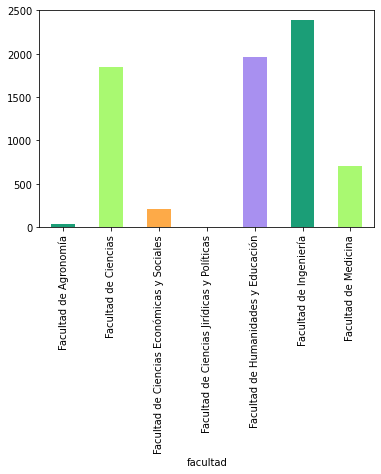

In [97]:
c = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
merged_gb_complex_school.size().plot(kind = "bar", color=c)

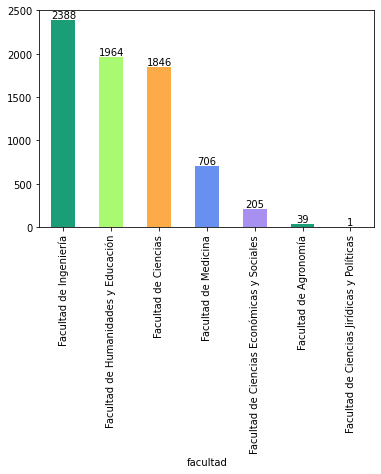

In [108]:
df = merged_inner
temp_df = df.groupby('facultad').size().sort_values(ascending=False)
    
ax = temp_df.plot(kind='bar', color=c)
    
ax.bar_label(ax.containers[0])
        
plt.show()

# Enseñar porcetaje de todas las facultades.

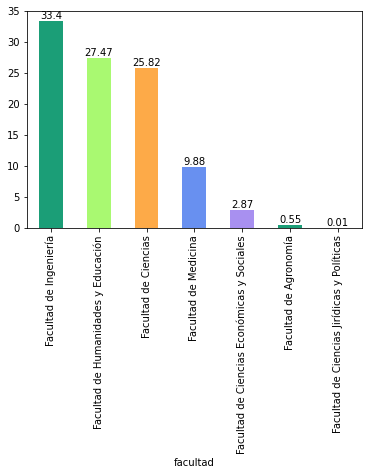

In [98]:
df = merged_inner
temp_df = round((df.groupby('facultad').size().sort_values(ascending=False) / df.groupby('facultad').size().sort_values(ascending=False).sum())*100, 2)
    
ax = temp_df.plot(kind='bar', color=c)
    
ax.bar_label(ax.containers[0])
        
plt.show()

# Enseñar porcetaje de todas las facultades.

In [99]:
merged_gb_complex_school_facultad = merged_inner.groupby(['facultad', 'school_complex'])
merged_size_f_scool = merged_gb_complex_school_facultad.size()
merged_size_f_scool

facultad                                    school_complex                                               
Facultad de Agronomía                       Escuela de Agronomía                                              39
Facultad de Ciencias                        Escuela de Biología                                              403
                                            Escuela de Computación                                           524
                                            Escuela de Física                                                172
                                            Escuela de Matemática                                            125
                                            Escuela de Química                                               622
Facultad de Ciencias Económicas y Sociales  Escuela de Administración y Contaduría                             1
                                            Escuela de Antropología                                    

In [100]:
only_ciencias = merged_inner[merged_inner['facultad']=='Facultad de Ciencias']
only_ciencias_gb = only_ciencias.groupby(['school_complex'])
only_ciencias_gb.size()

school_complex
Escuela de Biología       403
Escuela de Computación    524
Escuela de Física         172
Escuela de Matemática     125
Escuela de Química        622
dtype: int64

<AxesSubplot:xlabel='school_complex'>

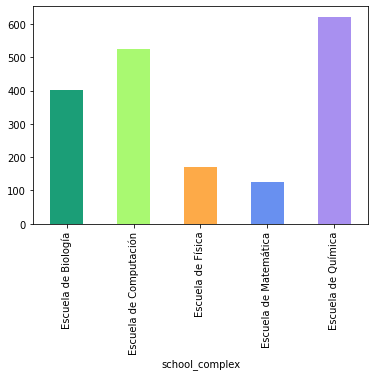

In [101]:
c = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
only_ciencias_gb.size().plot(kind = "bar", color=c)

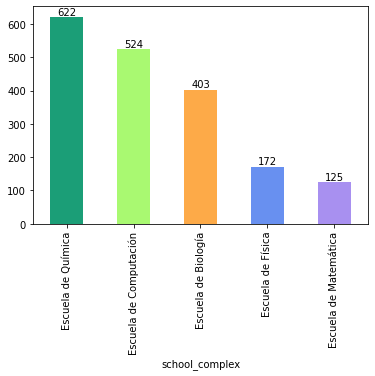

In [109]:
df = only_ciencias
temp_df = df.groupby('school_complex').size().sort_values(ascending=False)
    
ax = temp_df.plot(kind='bar', color=c)
    
ax.bar_label(ax.containers[0])
        
plt.show()

# Enseñar porcetaje de todas las facultades.

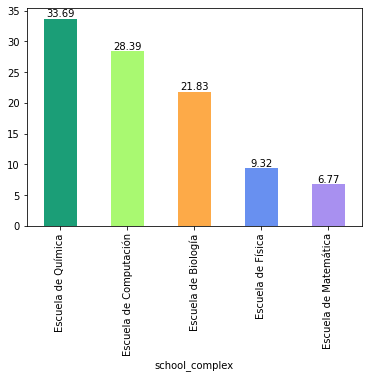

In [102]:
df = only_ciencias
temp_df = round((df.groupby('school_complex').size().sort_values(ascending=False) / df.groupby('school_complex').size().sort_values(ascending=False).sum())*100, 2)
    
ax = temp_df.plot(kind='bar', color=c)
    
ax.bar_label(ax.containers[0])
        
plt.show()

# Enseñar porcetaje de todas las facultades.

In [105]:
only_ing = merged_inner[merged_inner['facultad']=='Facultad de Ingeniería']
only_ing_gb = only_ing.groupby(['school_complex'])
only_ing_gb.size()

school_complex
Escuela de Geología, Minas y Geofísica                           519
Escuela de Ingeniería Civil                                      238
Escuela de Ingeniería Eléctrica                                  364
Escuela de Ingeniería Mecanica                                   470
Escuela de Ingeniería Metalúrgica y Ciencia de los Materiales     52
Escuela de Ingeniería Química                                    455
Escuela de Ingeniería de Petroleo                                290
dtype: int64

<AxesSubplot:xlabel='school_complex'>

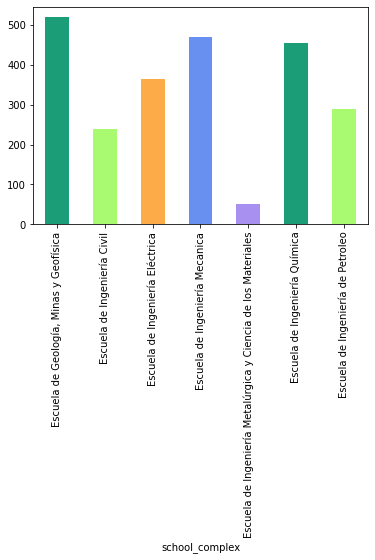

In [106]:
c = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
only_ing_gb.size().plot(kind = "bar", color=c)

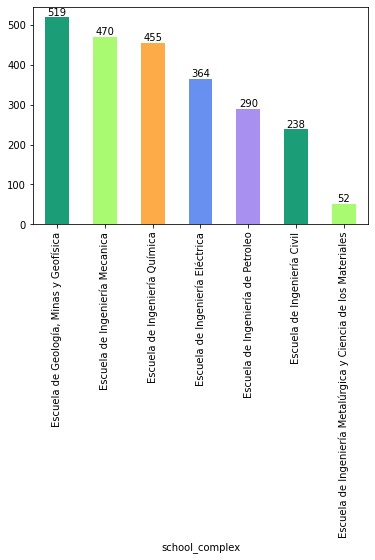

In [111]:
df = only_ing
temp_df = df.groupby('school_complex').size().sort_values(ascending=False)
    
ax = temp_df.plot(kind='bar', color=c)
    
ax.bar_label(ax.containers[0])
        
plt.show()

# Enseñar porcetaje de todas las facultades.

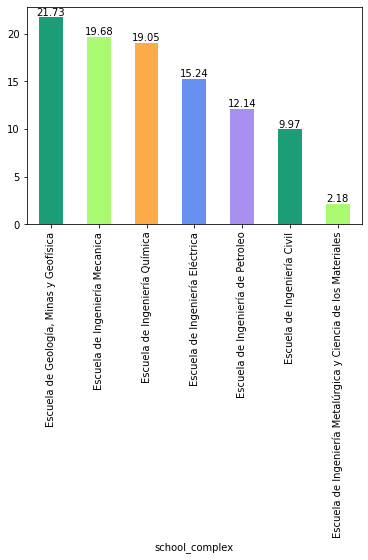

In [110]:
df = only_ing
temp_df = round((df.groupby('school_complex').size().sort_values(ascending=False) / df.groupby('school_complex').size().sort_values(ascending=False).sum())*100, 2)
    
ax = temp_df.plot(kind='bar', color=c)
    
ax.bar_label(ax.containers[0])
        
plt.show()

# Enseñar porcetaje de todas las facultades.

### Facultad con mas tesis

La faculta de ingenieria es la que mas tesis posee de las tesis obtenidas en pregrado, seguidas por la facultad de ciencias.

Otro dato es que de las 8211 tesis de pregrado solo 7149 son usables realmente, con texto y con escuela. Esto significa que 1062 tesis se perdieron. Lo cual significa una perdida de 12.933% desde la data inicial.

De las 11 facultades solo estan reflejadas 7. De las 43 Escuelas solo estan reflejadas 34 escuelas en las tesis descargadas.

In [157]:
8211 - 7149

1062

In [158]:
(1062*100)/8211

12.933869199853854

### Conclusiones

- Primer dataframe (Todas las tesis): Con un total de 8211.
- Segundo dataframe (Descargado o no?): De todas las tesis inicialmente mapeadas 8211, 38 no fueron descargadas, esto se debe a que hubo varios erroes en la descarga. Dando un total de 8173 Tesis de pregrado que fueron descargadas o completamente o parcialmente. Esto significa 0.462% de perdidas en la descarga.
- Tercer dataframe (Accesible o no?) De las 8211 tesis 8173 se lograron descargar y de las 8173 tesis 290 se descargaron con error (lo que quiere decir que 3.54% de las tesis descargadas tienen error), errores que la hacen imposible acceder a ella, ni como imagen ni como texto. Dando como total 7883 tesis de pregrado que si se pueden leer como pdf, es decir, son archivos que si se pueden abrir con un visor o editor de pdfs.
- Cuarto dataframe (Imagen o texto?): Solo 82 tesis eran imagenes, el resto era texto crudo, entonces de 7883 tesis que se descargaron correctamente, 7801 eran texto. Sacando resultados parecidos entones a la hora de tamaños que nos queda.  Lo que significa que solo 1.04% de las tesis descargadas que se pueden abrir, son imagenes.
- Quinto dataframe (Escuelas): Esto nos deja con un total de 636 escuela `No school` y 16 `None` Lo cual son 652 tesis o archivos, que no tienen escuela. Esto nos da un total 7149 tesis, antes de 7801 que si tiene escuelas que si tienen. Lo cual se refiere que de 7801 tesis de texto solo 7149 tiene escuela es decir se tiene una perdida de 8.35%.

### Otros datos:

- De las 11 facultades solo estan reflejadas 7. De las 43 Escuelas solo estan reflejadas 34 escuelas en las tesis descargadas.
- La escuela mas comun es la `Escuela de Enfermería` con 699 que representa 9.77% de todas las ecuelas.
- La facultad mas comun es la `Facultad de Ingeneria` con 2388 tesis lo cual representa 33.403% de todas las tesis.
- La facultad de ciencias representa 25.82% con 1846 ejemplares.
- La escuela de quimica tiene 622 tesis en la facultad de ciencias la cual la hace la mayor escuela en ciencias en terminos de tesis. La cual representa 33.69% de las tesis (1846)
- La escuela de computacion con 524 ejemplares representa 28.38% de las tesis de la facultad de ciencias y 7.32% de las tesis de toda la universidad.

In [163]:
#Escuela de enfermeria porcentaje
699*100/7149

9.777591271506504

In [164]:
# Facultad de Ingeneria porcentaje
2388*100/7149

33.40327318506085

In [165]:
#Facultad de ciencias porcentaje
1846*100/7149

25.821793257798294

In [166]:
# Representacion mas amplia en ciencia (quimica)
622*100/1846

33.69447453954496

In [167]:
#Escuela de computacion
524*100/1846

28.385698808234018

In [168]:
#Escuela de computacion en porcentaje con la universidad
524*100/7149

7.329696461043502

# Graficos

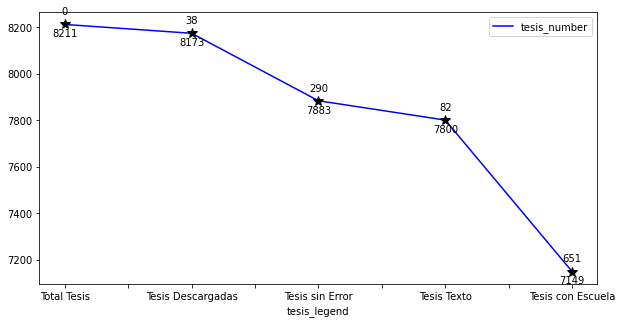

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tesis_number = [8211, 8173, 7883, 7800, 7149]
tesis_legend = ['Total Tesis', 'Tesis Descargadas', 'Tesis sin Error', 'Tesis Texto', 'Tesis con Escuela']
tesis_diff = [0, 38, 290, 82, 652]
d = {'tesis_number':tesis_number,'tesis_legend':tesis_legend}

data_frame = pd.DataFrame(d)

data_frame.plot(kind='line', color='blue', x='tesis_legend')
data_frame['tesis_number'].plot(marker='*', linestyle = 'None', color='black', ms=10, figsize=(10, 5))

for x,y,z in zip([0,1,2,3,4], tesis_number,[0, 38, 290, 82, 651]):

    label = "{:}".format(z)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
    label = "{:}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-12), # distance from text to points (x,y)
                 ha='center')

## Grafico de como las cantidad de tesis fue degradando con el tiempo.

In [13]:
### Valores de los modelos
model_name = ['BM25_top5', 'Old_NT_top5', 'New_NT_top5', 'model_1_top5', 'model_2_top5', 'model_3_top5',
              'model_4_top5', 'model_5_top5', 'model_6_top5', 'model_7_top5', 'model_8_top5', 'model_9_top5',
              'model_10_top5','BM25_top10', 'Old_NT_top10', 'New_NT_top10', 'model_1_top10', 'model_2_top10',
              'model_3_top10', 'model_4_top10','model_5_top10', 'model_6_top10', 'model_7_top10', 'model_8_top10',
              'model_9_top10', 'model_10_top10']

test_value_recall = [0.56, 0.28, 0.68, 0.64, 0.68, 0.6, 0.52, 0.68, 0.48, 0.68, 0.6, 0.68, 0.68,
                    0.6, 0.4, 0.84, 0.68, 0.8, 0.72, 0.6, 0.84, 0.64, 0.84, 0.8, 0.84, 0.84]
test_value_map = [0.479, 0.19, 0.5076, 0.456, 0.4993, 0.456, 0.363, 0.5076, 0.383, 0.5076, 0.4866, 0.5076, 0.5076,
                 0.471, 0.204, 0.516, 0.4253, 0.502, 0.475, 0.373, 0.516, 0.408, 0.5137, 0.498, 0.516, 0.516]

dev_value_recall = [0.7083, 0.333, 0.7083, 0.75, 0.75, 0.625, 0.5416, 0.75, 0.5416, 0.75, 0.625, 0.75, 0.75,
                   0.75, 0.458, 0.833, 0.7916, 0.7916, 0.75, 0.7083, 0.833, 0.666, 0.833, 0.7916, 0.833, 0.833]
dev_value_map = [0.5305, 0.2131, 0.525, 0.525, 0.499, 0.3541, 0.256, 0.5256, 0.2965, 0.5027, 0.3694, 0.525, 0.525,
                0.535, 0.233, 0.538, 0.404, 0.506, 0.373, 0.278, 0.538, 0.3163, 0.514, 0.395, 0.538, 0.538]


In [14]:
len(model_name)

26

In [15]:
len(test_value_recall)

26

In [16]:
len(test_value_map)

26

In [17]:
len(dev_value_recall)

26

In [18]:
len(dev_value_map)

26

In [19]:
aux_df = {'model_name': model_name, 'test_value_recall': test_value_recall, 'test_value_map': test_value_map, 
          'dev_value_recall': dev_value_recall, 'dev_value_map': dev_value_map}

val_df = pd.DataFrame(aux_df)
val_df

,model_name,test_value_recall,test_value_map,dev_value_recall,dev_value_map
0,BM25_top5,0.56,0.4790,0.7083,0.5305
1,Old_NT_top5,0.28,0.1900,0.3330,0.2131
2,New_NT_top5,0.68,0.5076,0.7083,0.5250
3,model_1_top5,0.64,0.4560,0.7500,0.5250
4,model_2_top5,0.68,0.4993,0.7500,0.4990
5,model_3_top5,0.60,0.4560,0.6250,0.3541
6,model_4_top5,0.52,0.3630,0.5416,0.2560
7,model_5_top5,0.68,0.5076,0.7500,0.5256
8,model_6_top5,0.48,0.3830,0.5416,0.2965
9,model_7_top5,0.68,0.5076,0.7500,0.5027


In [20]:
val_df['F1_test'] = round((2 * val_df['test_value_map'] * val_df['test_value_recall']) / (val_df['test_value_map'] + val_df['test_value_recall']), 2)
val_df['F1_dev'] = round((2 * val_df['dev_value_map'] * val_df['dev_value_recall']) / (val_df['dev_value_map'] + val_df['dev_value_recall']), 2)
val_df

,model_name,test_value_recall,test_value_map,dev_value_recall,dev_value_map,F1_test,F1_dev
0,BM25_top5,0.56,0.4790,0.7083,0.5305,0.52,0.61
1,Old_NT_top5,0.28,0.1900,0.3330,0.2131,0.23,0.26
2,New_NT_top5,0.68,0.5076,0.7083,0.5250,0.58,0.60
3,model_1_top5,0.64,0.4560,0.7500,0.5250,0.53,0.62
4,model_2_top5,0.68,0.4993,0.7500,0.4990,0.58,0.60
5,model_3_top5,0.60,0.4560,0.6250,0.3541,0.52,0.45
6,model_4_top5,0.52,0.3630,0.5416,0.2560,0.43,0.35
7,model_5_top5,0.68,0.5076,0.7500,0.5256,0.58,0.62
8,model_6_top5,0.48,0.3830,0.5416,0.2965,0.43,0.38
9,model_7_top5,0.68,0.5076,0.7500,0.5027,0.58,0.60


## TOP 5

Se realiza una comparacion entre los documentos recuperados en los top 5, se debe saber que las tesis que tienen 

In [21]:
bm25_fourbest_map_top5 = val_df.loc[val_df['model_name'].isin(['BM25_top5', 'model_9_top5', 'model_10_top5', 'New_NT_top5'])]
bm25_fourbest_map_top5

,model_name,test_value_recall,test_value_map,dev_value_recall,dev_value_map,F1_test,F1_dev
0,BM25_top5,0.56,0.4790,0.7083,0.5305,0.52,0.61
2,New_NT_top5,0.68,0.5076,0.7083,0.5250,0.58,0.60
11,model_9_top5,0.68,0.5076,0.7500,0.5250,0.58,0.62
12,model_10_top5,0.68,0.5076,0.7500,0.5250,0.58,0.62


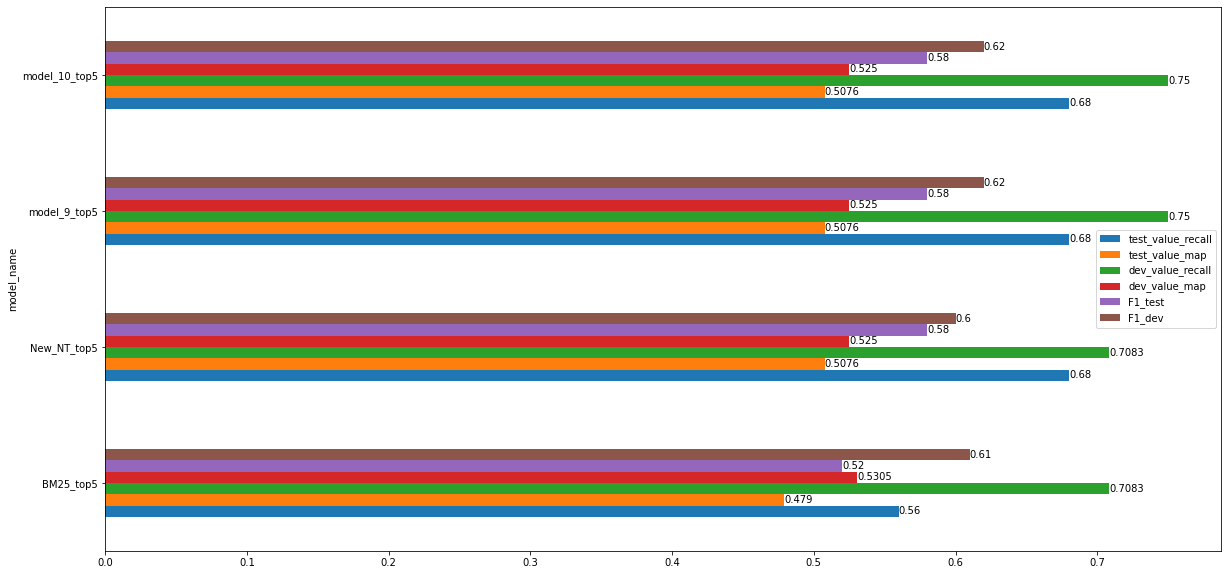

In [35]:
#comparacion de los 4 mejores modelos con el estadistico
graph_4best = bm25_fourbest_map_top5.set_index('model_name')
ax = graph_4best.plot(kind='barh',figsize=(20, 10))
for container in ax.containers:
    ax.bar_label(container)

In [22]:
bm25_fourworst_map_top5 = val_df.loc[val_df['model_name'].isin(['BM25_top5', 'model_4_top5', 'model_6_top5', 'New_NT_top5'])]
bm25_fourworst_map_top5

,model_name,test_value_recall,test_value_map,dev_value_recall,dev_value_map,F1_test,F1_dev
0,BM25_top5,0.56,0.4790,0.7083,0.5305,0.52,0.61
2,New_NT_top5,0.68,0.5076,0.7083,0.5250,0.58,0.60
6,model_4_top5,0.52,0.3630,0.5416,0.2560,0.43,0.35
8,model_6_top5,0.48,0.3830,0.5416,0.2965,0.43,0.38


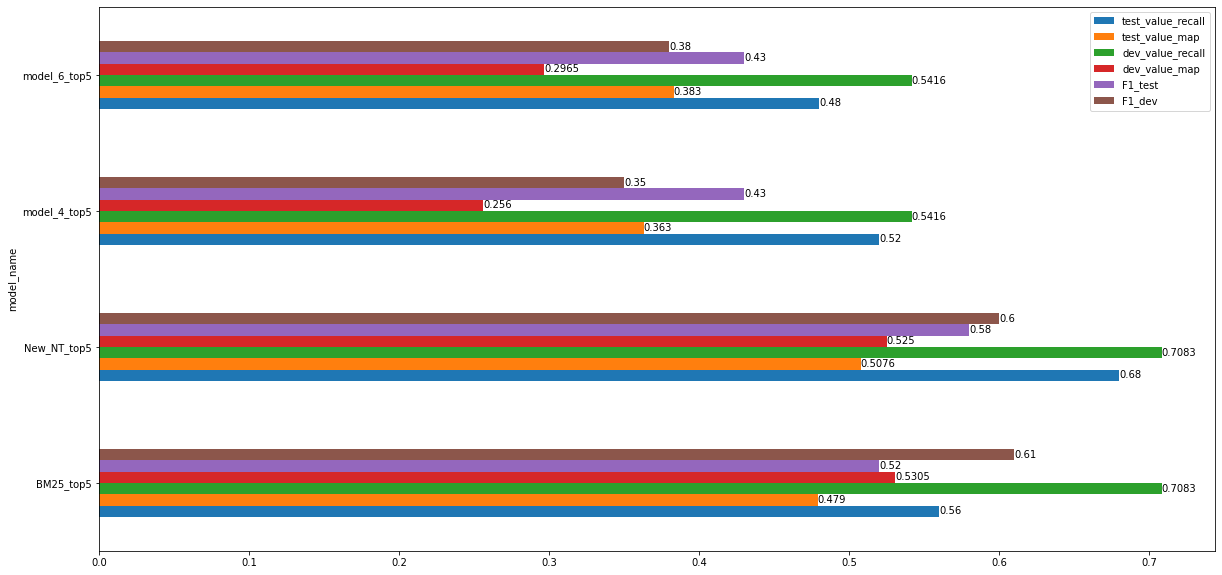

In [36]:
graph_4worst = bm25_fourworst_map_top5.set_index('model_name')
ax = graph_4worst.plot(kind='barh',figsize=(20, 10))
for container in ax.containers:
    ax.bar_label(container)

In [37]:
# Modelo viejo y modelo nuevo y estadistico
old_bm25_top5 = val_df.loc[val_df['model_name'].isin(['BM25_top5', 'Old_NT_top5', 'model_10_top5', 'New_NT_top5'])]
old_bm25_top5

,model_name,test_value_recall,test_value_map,dev_value_recall,dev_value_map,F1_test,F1_dev
0,BM25_top5,0.56,0.4790,0.7083,0.5305,0.52,0.61
1,Old_NT_top5,0.28,0.1900,0.3330,0.2131,0.23,0.26
2,New_NT_top5,0.68,0.5076,0.7083,0.5250,0.58,0.60
12,model_10_top5,0.68,0.5076,0.7500,0.5250,0.58,0.62


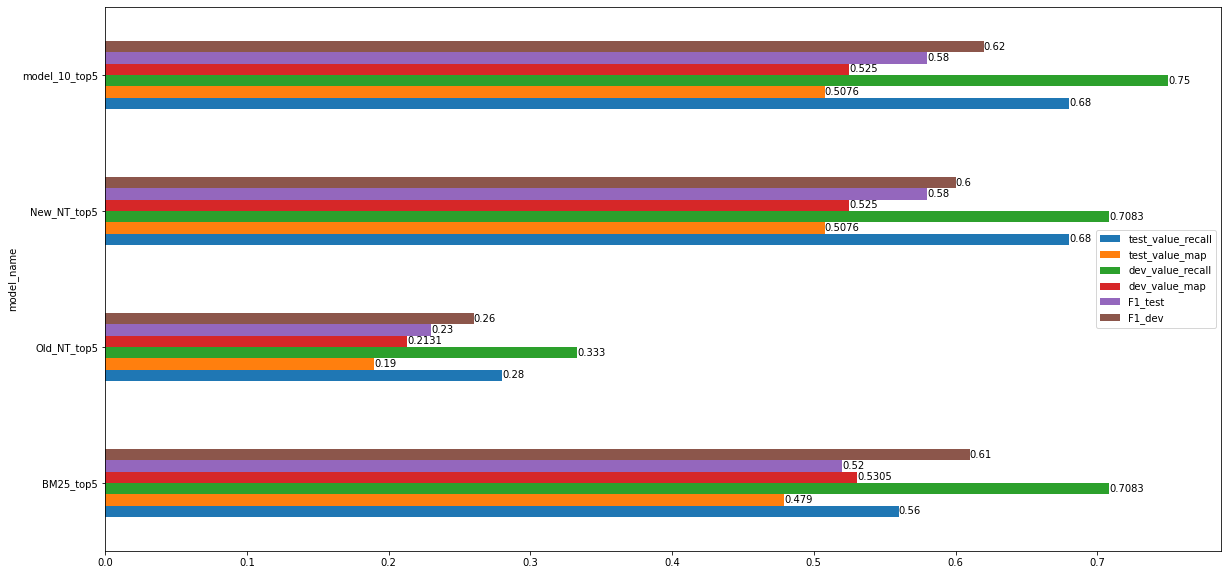

In [39]:
graph_old_bm25_top5 = old_bm25_top5.set_index('model_name')
ax = graph_old_bm25_top5.plot(kind='barh',figsize=(20, 10))
for container in ax.containers:
    ax.bar_label(container)

# Graficos top 10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_top10_eval = pd.read_csv("data/df_data_eval.csv")
df_top10_eval

,model_name,test_200_recall,test_200_map,dev_200_recall,dev_200_map,test_400_recall,test_400_map,dev_400_recall,dev_400_map
0,model_1,0.64,0.386,0.750,0.274,0.52,0.323,0.417,0.218
1,model_2,0.84,0.517,0.833,0.539,0.64,0.381,0.500,0.390
2,model_3,0.76,0.486,0.792,0.402,0.64,0.367,0.458,0.280
3,model_4,0.56,0.387,0.708,0.288,0.52,0.312,0.375,0.200
4,model_5,0.84,0.517,0.833,0.539,0.64,0.381,0.500,0.390
5,model_6,0.64,0.428,0.708,0.336,0.56,0.366,0.417,0.200
6,model_7,0.80,0.503,0.792,0.485,0.64,0.380,0.500,0.348
7,model_8,0.72,0.481,0.750,0.373,0.64,0.365,0.458,0.259
8,model_9,0.84,0.517,0.833,0.539,0.64,0.381,0.500,0.390
9,model_10,0.84,0.517,0.833,0.539,0.64,0.381,0.500,0.390


In [3]:
df_top10_eval['F1_200_test'] = round((2 * df_top10_eval['test_200_map'] * df_top10_eval['test_200_recall']) / (df_top10_eval['test_200_map'] + df_top10_eval['test_200_recall']), 2)
df_top10_eval['F1_200_dev'] = round((2 * df_top10_eval['dev_200_map'] * df_top10_eval['dev_200_recall']) / (df_top10_eval['dev_200_map'] + df_top10_eval['dev_200_recall']), 2)
df_top10_eval['F1_400_test'] = round((2 * df_top10_eval['test_400_map'] * df_top10_eval['test_400_recall']) / (df_top10_eval['test_400_map'] + df_top10_eval['test_400_recall']), 2)
df_top10_eval['F1_400_dev'] = round((2 * df_top10_eval['dev_400_map'] * df_top10_eval['dev_400_recall']) / (df_top10_eval['dev_400_map'] + df_top10_eval['dev_400_recall']), 2)

In [4]:
df_top10_eval

,model_name,test_200_recall,test_200_map,dev_200_recall,dev_200_map,test_400_recall,test_400_map,dev_400_recall,dev_400_map,F1_200_test,F1_200_dev,F1_400_test,F1_400_dev
0,model_1,0.64,0.386,0.750,0.274,0.52,0.323,0.417,0.218,0.48,0.40,0.40,0.29
1,model_2,0.84,0.517,0.833,0.539,0.64,0.381,0.500,0.390,0.64,0.65,0.48,0.44
2,model_3,0.76,0.486,0.792,0.402,0.64,0.367,0.458,0.280,0.59,0.53,0.47,0.35
3,model_4,0.56,0.387,0.708,0.288,0.52,0.312,0.375,0.200,0.46,0.41,0.39,0.26
4,model_5,0.84,0.517,0.833,0.539,0.64,0.381,0.500,0.390,0.64,0.65,0.48,0.44
5,model_6,0.64,0.428,0.708,0.336,0.56,0.366,0.417,0.200,0.51,0.46,0.44,0.27
6,model_7,0.80,0.503,0.792,0.485,0.64,0.380,0.500,0.348,0.62,0.60,0.48,0.41
7,model_8,0.72,0.481,0.750,0.373,0.64,0.365,0.458,0.259,0.58,0.50,0.46,0.33
8,model_9,0.84,0.517,0.833,0.539,0.64,0.381,0.500,0.390,0.64,0.65,0.48,0.44
9,model_10,0.84,0.517,0.833,0.539,0.64,0.381,0.500,0.390,0.64,0.65,0.48,0.44


In [5]:
bm25_basemodel = df_top10_eval.loc[df_top10_eval['model_name'].isin(['bm25', 'base_model'])]
bm25_basemodel

,model_name,test_200_recall,test_200_map,dev_200_recall,dev_200_map,test_400_recall,test_400_map,dev_400_recall,dev_400_map,F1_200_test,F1_200_dev,F1_400_test,F1_400_dev
10,base_model,0.84,0.517,0.833,0.539,0.64,0.381,0.500,0.390,0.64,0.65,0.48,0.44
12,bm25,0.68,0.469,0.750,0.537,0.76,0.487,0.792,0.568,0.56,0.63,0.59,0.66


In [6]:
bm25_basemodel_test = bm25_basemodel.drop(['dev_200_recall', 'dev_200_map', 'dev_400_recall', 'dev_400_map', 'F1_200_dev', 'F1_400_dev'], axis=1)

bm25_basemodel_dev = bm25_basemodel.drop(['test_200_recall', 'test_200_map', 'test_400_recall', 'test_400_map', 'F1_200_test', 'F1_400_test'], axis=1)

## Comparasion DEV

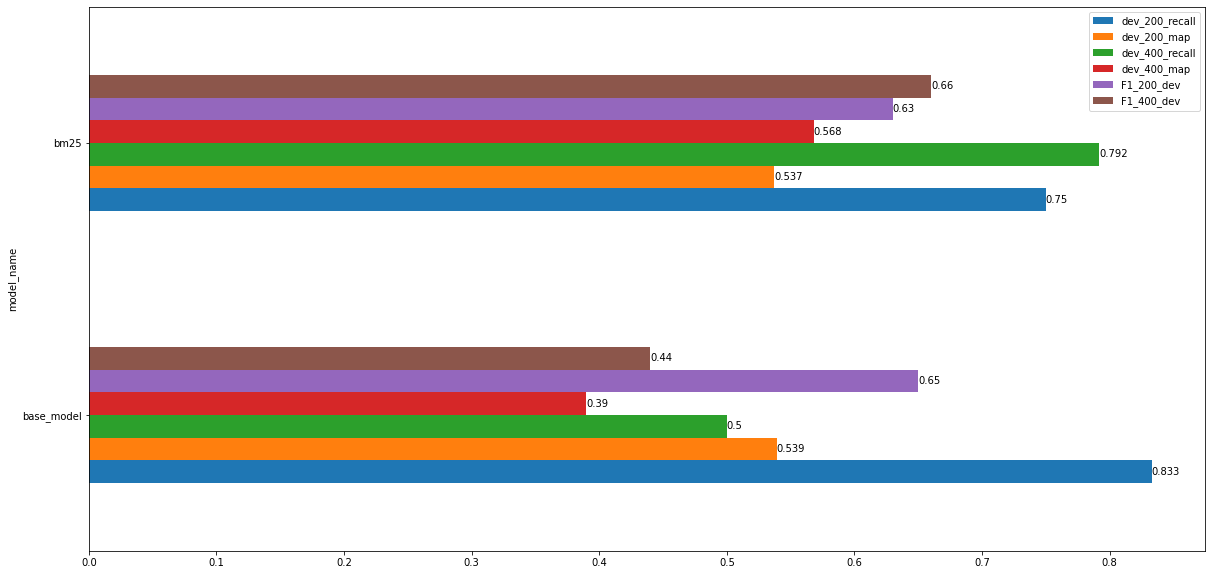

In [7]:
bm_25_coparison_dev = bm25_basemodel_dev.set_index('model_name')
ax = bm_25_coparison_dev.plot(kind='barh',figsize=(20, 10))
for container in ax.containers:
    ax.bar_label(container)

## Comprasion TEST

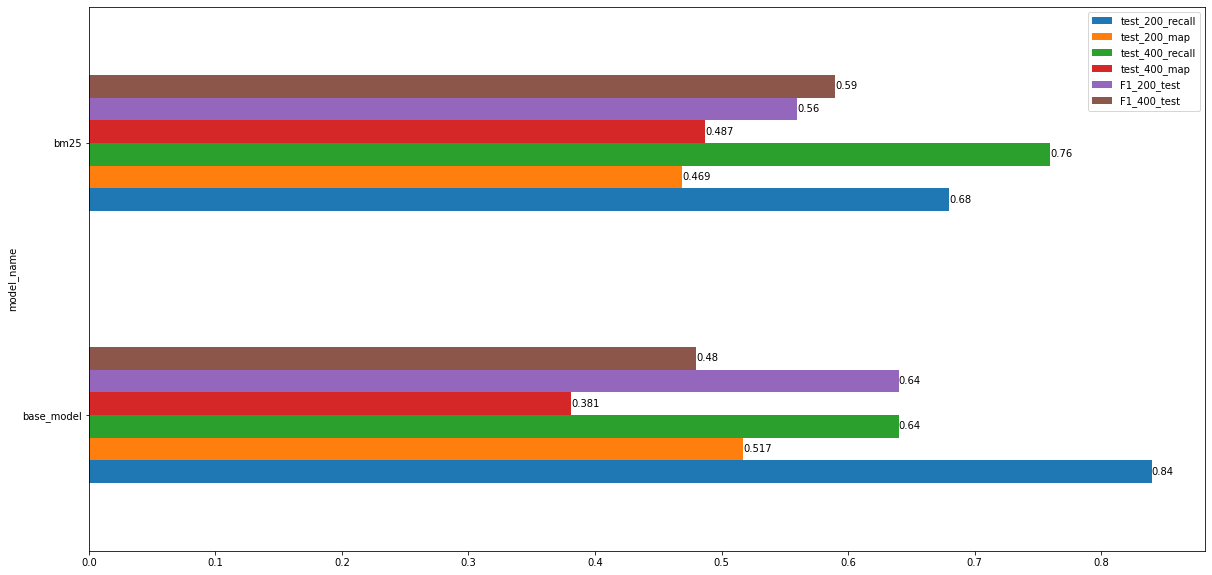

In [8]:
bm_25_coparison_test = bm25_basemodel_test.set_index('model_name')
ax = bm_25_coparison_test.plot(kind='barh',figsize=(20, 10))
for container in ax.containers:
    ax.bar_label(container)

## Peores modelos

In [9]:
bm25_old_basemodel = df_top10_eval.loc[df_top10_eval['model_name'].isin(['bm25', 'old_base_model', 'model_6', 'base_model'])]
bm25_old_basemodel

,model_name,test_200_recall,test_200_map,dev_200_recall,dev_200_map,test_400_recall,test_400_map,dev_400_recall,dev_400_map,F1_200_test,F1_200_dev,F1_400_test,F1_400_dev
5,model_6,0.64,0.428,0.708,0.336,0.56,0.366,0.417,0.200,0.51,0.46,0.44,0.27
10,base_model,0.84,0.517,0.833,0.539,0.64,0.381,0.500,0.390,0.64,0.65,0.48,0.44
11,old_base_model,0.40,0.204,0.458,0.233,0.24,0.124,0.292,0.145,0.27,0.31,0.16,0.19
12,bm25,0.68,0.469,0.750,0.537,0.76,0.487,0.792,0.568,0.56,0.63,0.59,0.66


In [10]:
bm25_old_basemodel_test = bm25_old_basemodel.drop(['dev_200_recall', 'dev_200_map', 'dev_400_recall', 'dev_400_map', 'F1_200_dev', 'F1_400_dev'], axis=1)

bm25_old_basemodel_dev = bm25_old_basemodel.drop(['test_200_recall', 'test_200_map', 'test_400_recall', 'test_400_map', 'F1_200_test', 'F1_400_test'], axis=1)

### Comparasion dev

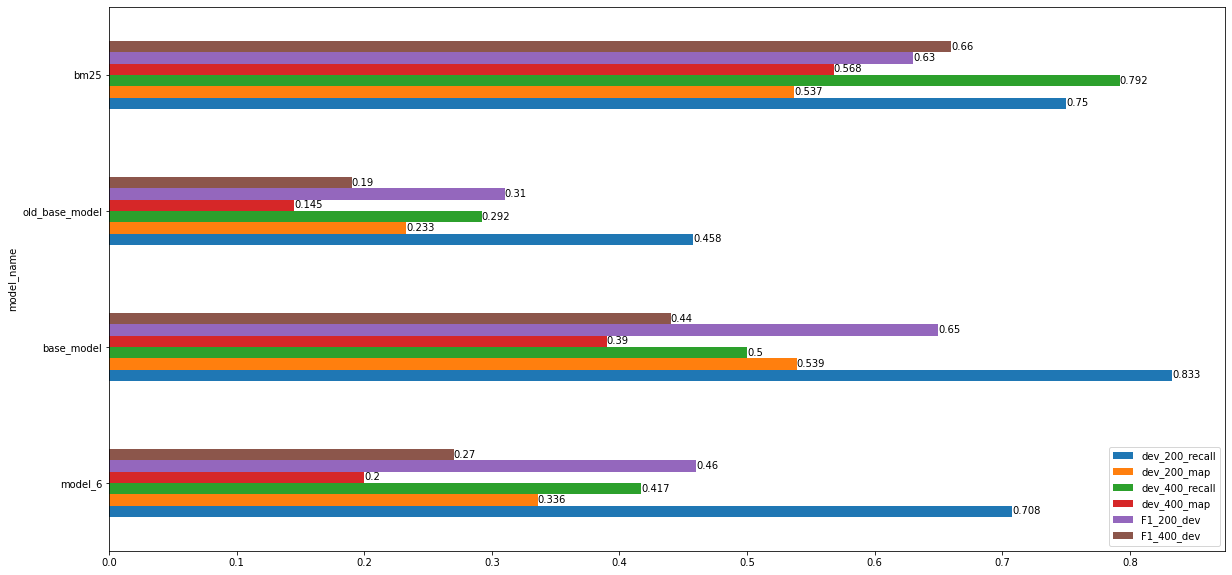

In [11]:
bm_25_coparison_dev_old = bm25_old_basemodel_dev.set_index('model_name')
ax = bm_25_coparison_dev_old.plot(kind='barh',figsize=(20, 10))
for container in ax.containers:
    ax.bar_label(container)

### Comparasion test

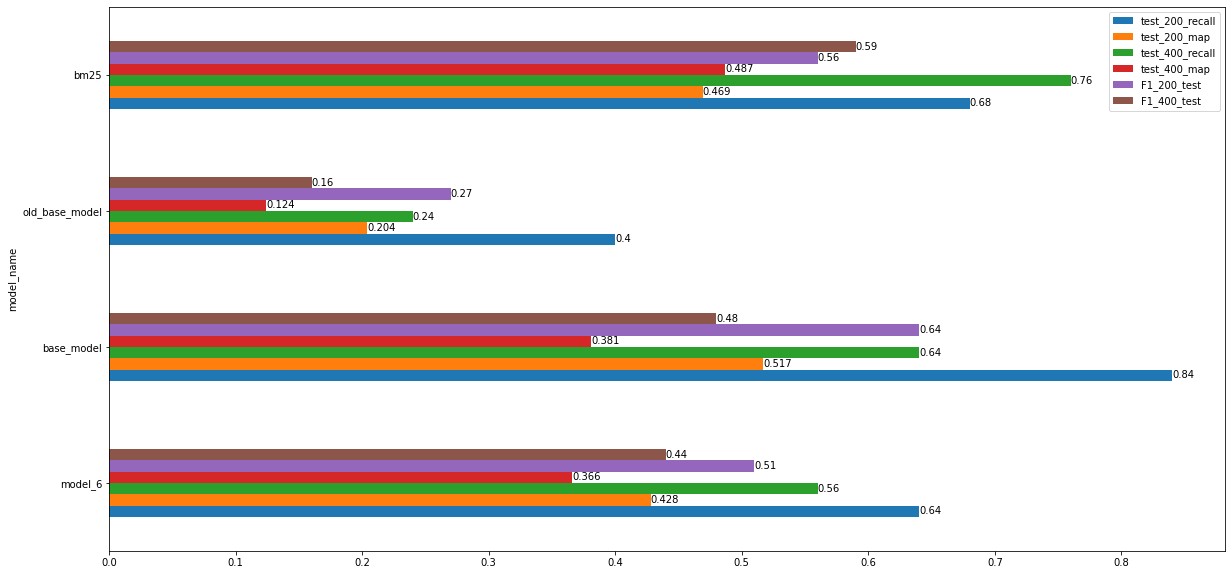

In [12]:
bm_25_coparison_test_old = bm25_old_basemodel_test.set_index('model_name')
ax = bm_25_coparison_test_old.plot(kind='barh',figsize=(20, 10))
for container in ax.containers:
    ax.bar_label(container)

## 200

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df_top10_eval = pd.read_csv("data/df_data_eval_200_train.csv")
df_top10_eval

,model_name,test_200_recall,test_200_map,dev_200_recall,dev_200_map,test_400_recall,test_400_map,dev_400_recall,dev_400_map
0,model_1,0.60,0.305,0.667,0.235,0.44,0.254,0.333,0.169
1,model_2,0.60,0.305,0.667,0.235,0.44,0.254,0.333,0.169
2,model_3,0.60,0.308,0.667,0.233,0.44,0.266,0.333,0.176
3,model_4,0.56,0.343,0.625,0.205,0.48,0.281,0.333,0.164
4,model_5,0.56,0.343,0.625,0.204,0.48,0.281,0.333,0.162
5,model_6,0.60,0.367,0.667,0.255,0.48,0.294,0.333,0.181
6,model_7,0.56,0.343,0.625,0.204,0.48,0.281,0.333,0.162
7,model_8,0.60,0.364,0.625,0.208,0.48,0.281,0.333,0.165
8,model_9,0.60,0.364,0.625,0.208,0.48,0.281,0.333,0.165
9,model_10,0.60,0.364,0.625,0.208,0.48,0.281,0.333,0.165


In [15]:
df_top10_eval['F1_200_test'] = round((2 * df_top10_eval['test_200_map'] * df_top10_eval['test_200_recall']) / (df_top10_eval['test_200_map'] + df_top10_eval['test_200_recall']), 2)
df_top10_eval['F1_200_dev'] = round((2 * df_top10_eval['dev_200_map'] * df_top10_eval['dev_200_recall']) / (df_top10_eval['dev_200_map'] + df_top10_eval['dev_200_recall']), 2)
df_top10_eval['F1_400_test'] = round((2 * df_top10_eval['test_400_map'] * df_top10_eval['test_400_recall']) / (df_top10_eval['test_400_map'] + df_top10_eval['test_400_recall']), 2)
df_top10_eval['F1_400_dev'] = round((2 * df_top10_eval['dev_400_map'] * df_top10_eval['dev_400_recall']) / (df_top10_eval['dev_400_map'] + df_top10_eval['dev_400_recall']), 2)

In [16]:
df_top10_eval

,model_name,test_200_recall,test_200_map,dev_200_recall,dev_200_map,test_400_recall,test_400_map,dev_400_recall,dev_400_map,F1_200_test,F1_200_dev,F1_400_test,F1_400_dev
0,model_1,0.60,0.305,0.667,0.235,0.44,0.254,0.333,0.169,0.40,0.35,0.32,0.22
1,model_2,0.60,0.305,0.667,0.235,0.44,0.254,0.333,0.169,0.40,0.35,0.32,0.22
2,model_3,0.60,0.308,0.667,0.233,0.44,0.266,0.333,0.176,0.41,0.35,0.33,0.23
3,model_4,0.56,0.343,0.625,0.205,0.48,0.281,0.333,0.164,0.43,0.31,0.35,0.22
4,model_5,0.56,0.343,0.625,0.204,0.48,0.281,0.333,0.162,0.43,0.31,0.35,0.22
5,model_6,0.60,0.367,0.667,0.255,0.48,0.294,0.333,0.181,0.46,0.37,0.36,0.23
6,model_7,0.56,0.343,0.625,0.204,0.48,0.281,0.333,0.162,0.43,0.31,0.35,0.22
7,model_8,0.60,0.364,0.625,0.208,0.48,0.281,0.333,0.165,0.45,0.31,0.35,0.22
8,model_9,0.60,0.364,0.625,0.208,0.48,0.281,0.333,0.165,0.45,0.31,0.35,0.22
9,model_10,0.60,0.364,0.625,0.208,0.48,0.281,0.333,0.165,0.45,0.31,0.35,0.22


In [17]:
bm25_basemodel = df_top10_eval.loc[df_top10_eval['model_name'].isin(['bm25', 'base_model'])]
bm25_basemodel

,model_name,test_200_recall,test_200_map,dev_200_recall,dev_200_map,test_400_recall,test_400_map,dev_400_recall,dev_400_map,F1_200_test,F1_200_dev,F1_400_test,F1_400_dev
10,base_model,0.84,0.517,0.833,0.539,0.64,0.381,0.500,0.390,0.64,0.65,0.48,0.44
12,bm25,0.68,0.469,0.750,0.537,0.76,0.487,0.792,0.568,0.56,0.63,0.59,0.66


In [18]:
bm25_basemodel_test = bm25_basemodel.drop(['dev_200_recall', 'dev_200_map', 'dev_400_recall', 'dev_400_map', 'F1_200_dev', 'F1_400_dev'], axis=1)

bm25_basemodel_dev = bm25_basemodel.drop(['test_200_recall', 'test_200_map', 'test_400_recall', 'test_400_map', 'F1_200_test', 'F1_400_test'], axis=1)

## Comparasion DEV

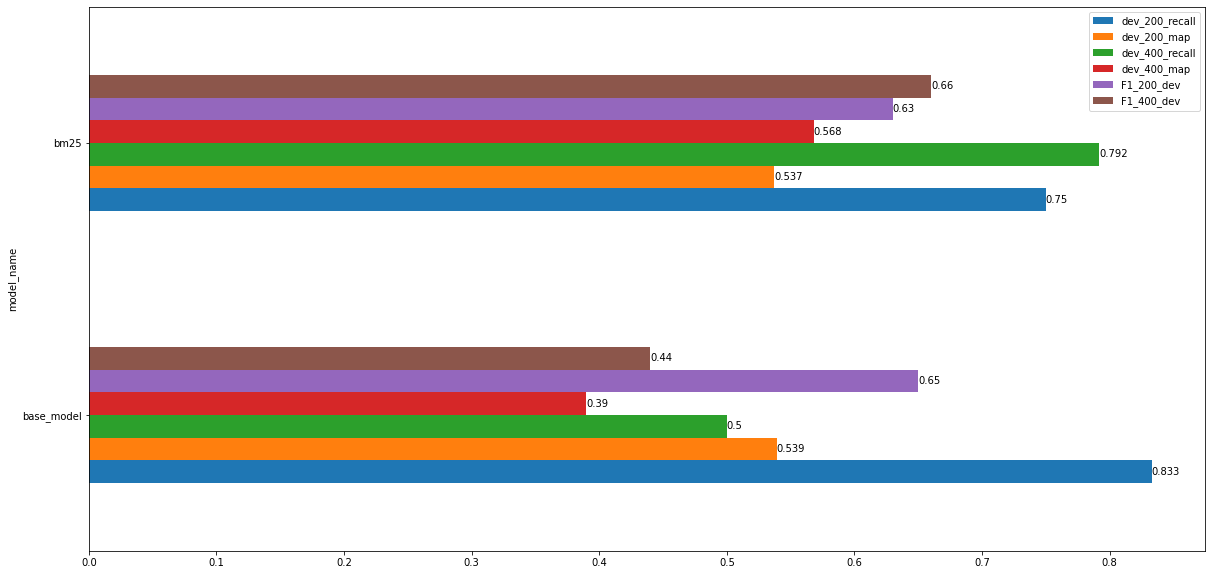

In [19]:
bm_25_coparison_dev = bm25_basemodel_dev.set_index('model_name')
ax = bm_25_coparison_dev.plot(kind='barh',figsize=(20, 10))
for container in ax.containers:
    ax.bar_label(container)

## Comprasion TEST

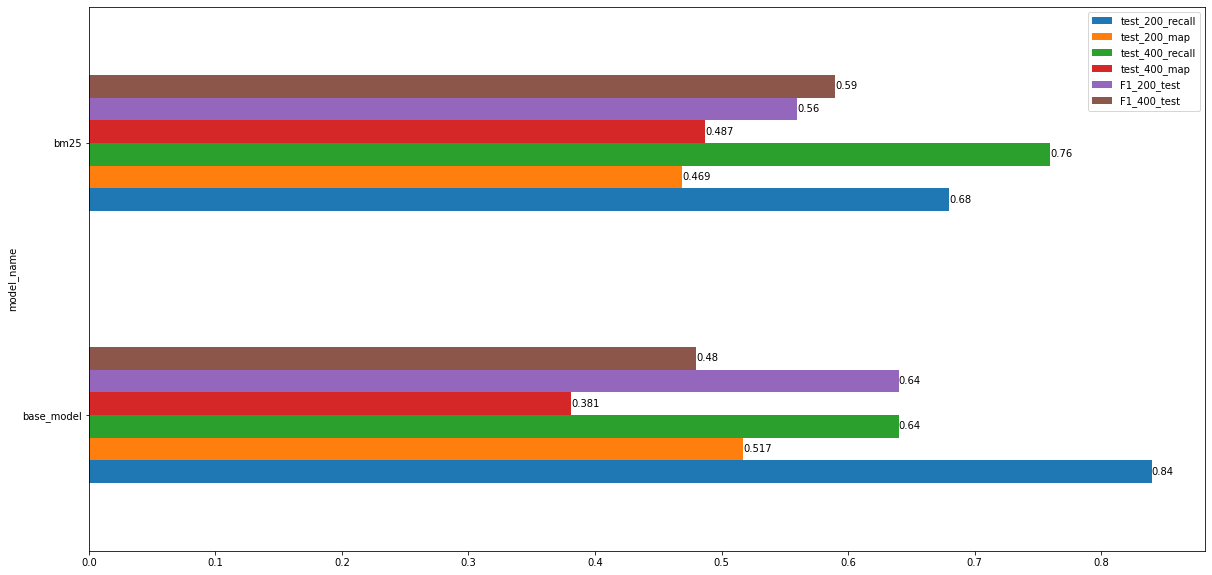

In [20]:
bm_25_coparison_test = bm25_basemodel_test.set_index('model_name')
ax = bm_25_coparison_test.plot(kind='barh',figsize=(20, 10))
for container in ax.containers:
    ax.bar_label(container)

## Peores modelos

In [21]:
bm25_old_basemodel = df_top10_eval.loc[df_top10_eval['model_name'].isin(['bm25', 'old_base_model', 'model_6', 'base_model'])]
bm25_old_basemodel

,model_name,test_200_recall,test_200_map,dev_200_recall,dev_200_map,test_400_recall,test_400_map,dev_400_recall,dev_400_map,F1_200_test,F1_200_dev,F1_400_test,F1_400_dev
5,model_6,0.60,0.367,0.667,0.255,0.48,0.294,0.333,0.181,0.46,0.37,0.36,0.23
10,base_model,0.84,0.517,0.833,0.539,0.64,0.381,0.500,0.390,0.64,0.65,0.48,0.44
11,old_base_model,0.40,0.204,0.458,0.233,0.24,0.124,0.292,0.145,0.27,0.31,0.16,0.19
12,bm25,0.68,0.469,0.750,0.537,0.76,0.487,0.792,0.568,0.56,0.63,0.59,0.66


In [22]:
bm25_old_basemodel_test = bm25_old_basemodel.drop(['dev_200_recall', 'dev_200_map', 'dev_400_recall', 'dev_400_map', 'F1_200_dev', 'F1_400_dev'], axis=1)

bm25_old_basemodel_dev = bm25_old_basemodel.drop(['test_200_recall', 'test_200_map', 'test_400_recall', 'test_400_map', 'F1_200_test', 'F1_400_test'], axis=1)

### Comparasion dev

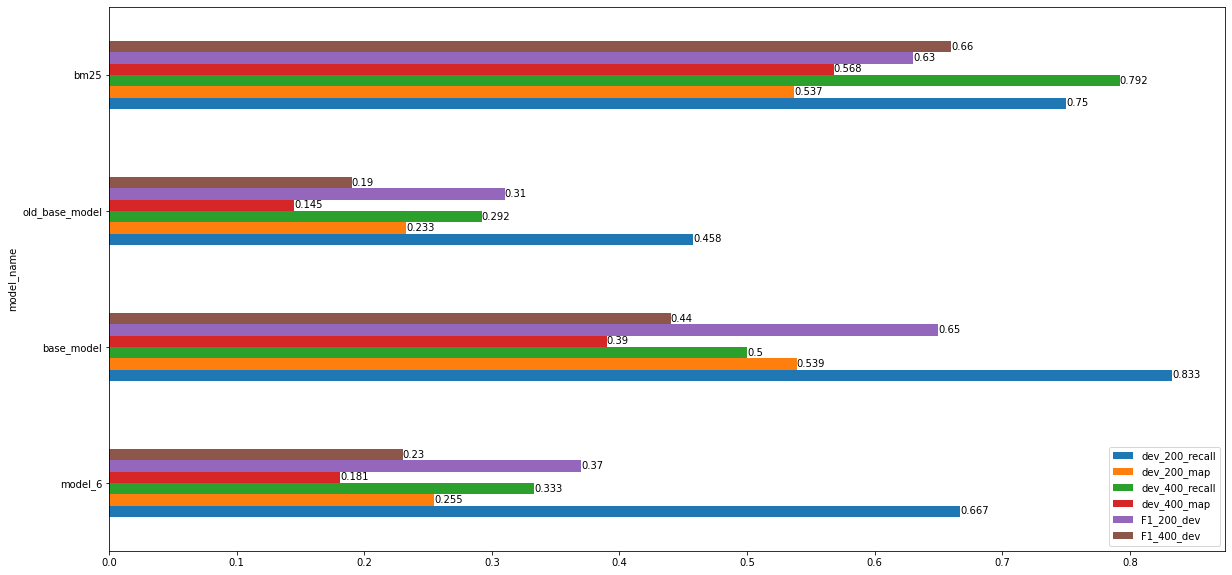

In [23]:
bm_25_coparison_dev_old = bm25_old_basemodel_dev.set_index('model_name')
ax = bm_25_coparison_dev_old.plot(kind='barh',figsize=(20, 10))
for container in ax.containers:
    ax.bar_label(container)

### Comparasion test

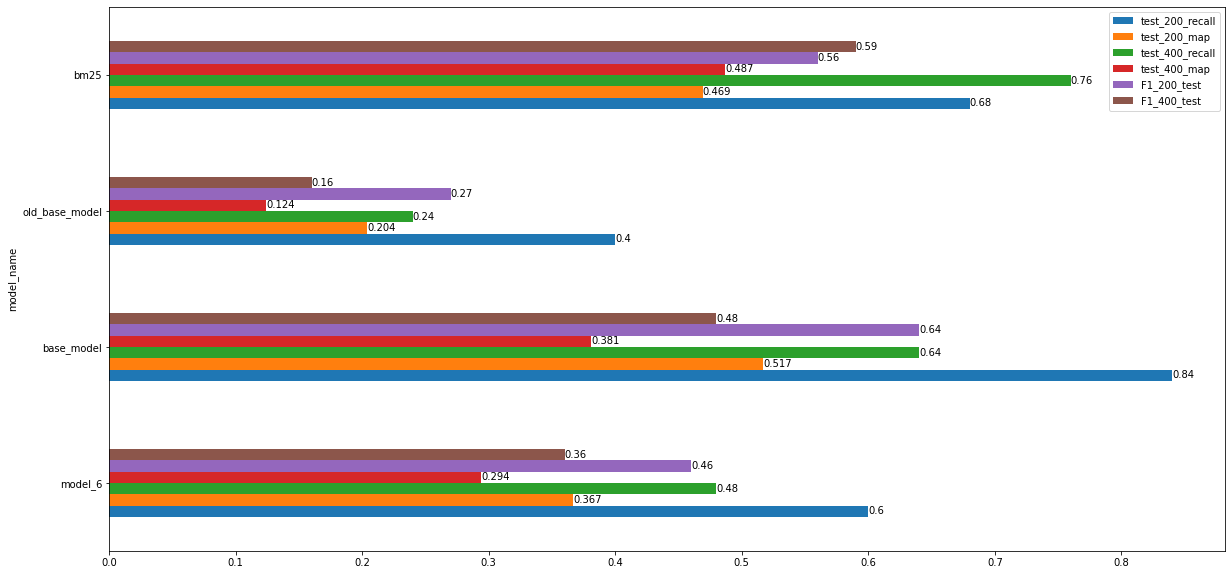

In [24]:
bm_25_coparison_test_old = bm25_old_basemodel_test.set_index('model_name')
ax = bm_25_coparison_test_old.plot(kind='barh',figsize=(20, 10))
for container in ax.containers:
    ax.bar_label(container)